In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns
from scipy import stats

## Understanding datasets

In [134]:
df=pd.read_csv('Dataset/dft-road-casualty-statistics-accident-last-5-years.csv', low_memory=False)
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2.02E+12,2016,10000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,...,0,5,1,1,0,0,1,1,2,E01000543
1,2.02E+12,2016,10000006,551920.0,174560.0,0.184928,51.449595,1,3,1,...,0,4,1,1,0,0,1,1,2,E01000375
2,2.02E+12,2016,10000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,...,0,4,1,1,0,0,1,1,2,E01033725
3,2.02E+12,2016,10000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,...,0,1,1,1,0,0,1,1,2,E01003379
4,2.02E+12,2016,10000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,...,0,1,1,1,0,0,1,1,2,E01002583


In [135]:
df.tail()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
597968,2.02E+12,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
597969,2.02E+12,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
597970,2.02E+12,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
597971,2.02E+12,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1
597972,2.02E+12,2020,991032575,240402.0,681950.0,-4.561040,56.003843,99,3,1,...,0,1,1,1,0,2,1,1,-1,-1


In [136]:
df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2.02E+12,2016,10000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,...,0,5,1,1,0,0,1,1,2,E01000543
1,2.02E+12,2016,10000006,551920.0,174560.0,0.184928,51.449595,1,3,1,...,0,4,1,1,0,0,1,1,2,E01000375
2,2.02E+12,2016,10000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,...,0,4,1,1,0,0,1,1,2,E01033725
3,2.02E+12,2016,10000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,...,0,1,1,1,0,0,1,1,2,E01003379
4,2.02E+12,2016,10000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,...,0,1,1,1,0,0,1,1,2,E01002583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597968,2.02E+12,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
597969,2.02E+12,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
597970,2.02E+12,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
597971,2.02E+12,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [137]:
df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,597973.0,2017.827266,1.381319,2016.000000,2017.000000,2018.000000,2019.000000,2.020000e+03
location_easting_osgr,597850.0,451703.358935,94929.997358,64084.000000,388020.000000,457990.500000,528980.000000,6.553910e+05
location_northing_osgr,597850.0,282043.804647,152864.644216,10235.000000,175705.000000,222711.500000,387381.000000,1.209512e+06
longitude,597840.0,-1.260225,1.392031,-7.525273,-2.180570,-1.143562,-0.141011,1.759641e+00
latitude,597840.0,52.425656,1.376865,49.912362,51.467411,51.888019,53.380777,6.076372e+01
police_force,597973.0,28.574257,24.915142,1.000000,5.000000,23.000000,45.000000,9.900000e+01
accident_severity,597973.0,2.792099,0.437881,1.000000,3.000000,3.000000,3.000000,3.000000e+00
number_of_vehicles,597973.0,1.842209,0.709933,1.000000,1.000000,2.000000,2.000000,2.400000e+01
number_of_casualties,597973.0,1.307276,0.756494,1.000000,1.000000,1.000000,1.000000,5.900000e+01
day_of_week,597973.0,4.109935,1.924954,1.000000,2.000000,4.000000,6.000000,7.000000e+00


In [139]:
df.isnull().sum()

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          123
location_northing_osgr                         123
longitude                                      133
latitude                                       133
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [140]:
df2=pd.read_csv('Dataset/dft-road-casualty-statistics-casualty-last-5-years.csv', low_memory=False)
df2

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2016010000005,2016,010000005,2,1,1,1,23,5,3,0,0,0,0,0,2,1,4
1,2016010000006,2016,010000006,1,1,1,2,36,7,3,0,0,0,0,0,9,1,10
2,2016010000008,2016,010000008,1,1,1,1,24,5,3,0,0,0,0,0,9,1,8
3,2016010000016,2016,010000016,1,1,2,2,59,9,3,0,0,0,3,0,11,1,4
4,2016010000018,2016,010000018,2,1,1,1,28,6,3,0,0,0,0,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781711,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
781712,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
781713,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
781714,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [141]:
df2.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2016010000005,2016,010000005,2,1,1,1,23,5,3,0,0,0,0,0,2,1,4
1,2016010000006,2016,010000006,1,1,1,2,36,7,3,0,0,0,0,0,9,1,10
2,2016010000008,2016,010000008,1,1,1,1,24,5,3,0,0,0,0,0,9,1,8
3,2016010000016,2016,010000016,1,1,2,2,59,9,3,0,0,0,3,0,11,1,4
4,2016010000018,2016,010000018,2,1,1,1,28,6,3,0,0,0,0,0,1,1,6


In [142]:
df2.tail()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
781711,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
781712,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
781713,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
781714,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9
781715,2020991032575,2020,991032575,1,1,3,1,48,8,3,9,9,0,0,0,0,1,1


In [143]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,781716.0,2017.808837,1.377568,2016.0,2017.0,2018.0,2019.0,2020.0
vehicle_reference,781716.0,1.477553,1.711188,1.0,1.0,1.0,2.0,999.0
casualty_reference,781716.0,1.393182,2.454991,1.0,1.0,1.0,1.0,992.0
casualty_class,781716.0,1.485053,0.722330,1.0,1.0,1.0,2.0,3.0
sex_of_casualty,781716.0,1.395642,0.502698,-1.0,1.0,1.0,2.0,9.0
age_of_casualty,781716.0,36.660602,19.393478,-1.0,22.0,33.0,50.0,102.0
age_band_of_casualty,781716.0,6.306182,2.414841,-1.0,5.0,6.0,8.0,11.0
casualty_severity,781716.0,2.825593,0.407362,1.0,3.0,3.0,3.0,3.0
pedestrian_location,781716.0,0.730536,2.080773,-1.0,0.0,0.0,0.0,10.0
pedestrian_movement,781716.0,0.570428,1.871116,-1.0,0.0,0.0,0.0,9.0


In [144]:
df2.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')

In [145]:
df2.isnull().sum()

accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

## Combining dataFrames

In [146]:
f=[df,df2]
c=pd.concat(f,axis=1,join='inner')
c

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2.02E+12,2016,10000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,...,5,3,0,0,0,0,0,2,1,4
1,2.02E+12,2016,10000006,551920.0,174560.0,0.184928,51.449595,1,3,1,...,7,3,0,0,0,0,0,9,1,10
2,2.02E+12,2016,10000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,...,5,3,0,0,0,0,0,9,1,8
3,2.02E+12,2016,10000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,...,9,3,0,0,0,3,0,11,1,4
4,2.02E+12,2016,10000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,...,6,3,0,0,0,0,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597968,2.02E+12,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,8,3,0,0,0,0,0,8,1,1
597969,2.02E+12,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,7,3,0,0,0,0,0,9,1,2
597970,2.02E+12,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,7,3,0,0,0,0,0,3,-1,-1
597971,2.02E+12,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,10,3,0,0,0,0,0,5,2,9


In [147]:
c.head().T

,0,1,2,3,4
accident_index,2.02E+12,2.02E+12,2.02E+12,2.02E+12,2.02E+12
accident_year,2016,2016,2016,2016,2016
accident_reference,10000005,10000006,10000008,10000016,10000018
location_easting_osgr,519310.0,551920.0,505930.0,527770.0,510740.0
location_northing_osgr,188730.0,174560.0,183850.0,168930.0,177230.0
longitude,-0.279323,0.184928,-0.473837,-0.164442,-0.40658
latitude,51.584754,51.449595,51.543563,51.404958,51.483139
police_force,1,1,1,1,1
accident_severity,3,3,3,3,3
number_of_vehicles,2,1,1,1,2


In [148]:
c.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,597973.0,2017.827266,1.381319,2016.000000,2017.000000,2018.000000,2019.000000,2.020000e+03
location_easting_osgr,597850.0,451703.358935,94929.997358,64084.000000,388020.000000,457990.500000,528980.000000,6.553910e+05
location_northing_osgr,597850.0,282043.804647,152864.644216,10235.000000,175705.000000,222711.500000,387381.000000,1.209512e+06
longitude,597840.0,-1.260225,1.392031,-7.525273,-2.180570,-1.143562,-0.141011,1.759641e+00
latitude,597840.0,52.425656,1.376865,49.912362,51.467411,51.888019,53.380777,6.076372e+01
police_force,597973.0,28.574257,24.915142,1.000000,5.000000,23.000000,45.000000,9.900000e+01
accident_severity,597973.0,2.792099,0.437881,1.000000,3.000000,3.000000,3.000000,3.000000e+00
number_of_vehicles,597973.0,1.842209,0.709933,1.000000,1.000000,2.000000,2.000000,2.400000e+01
number_of_casualties,597973.0,1.307276,0.756494,1.000000,1.000000,1.000000,1.000000,5.900000e+01
day_of_week,597973.0,4.109935,1.924954,1.000000,2.000000,4.000000,6.000000,7.000000e+00


In [149]:
cdf = c.loc[:,~c.columns.duplicated()]
print(cdf.columns)
print(cdf.shape)

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'vehicle_reference',
       'casualty_reference', 'casualty_class', 'sex_of_casualty',
       'ag

In [150]:
cdf.isnull().sum()

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          123
location_northing_osgr                         123
longitude                                      133
latitude                                       133
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [151]:
data=cdf[['accident_year', 'date', 'day_of_week', 'time',
       'longitude','latitude', 'local_authority_district','casualty_home_area_type',
        'sex_of_casualty','age_of_casualty', 'age_band_of_casualty',
        'accident_severity', 'casualty_type','number_of_vehicles',
        'first_road_class', 'road_type', 'speed_limit', 'junction_detail', 'junction_control',
        'light_conditions','weather_conditions', 'road_surface_conditions','special_conditions_at_site', 'carriageway_hazards']]
print(data.columns)
print(data.shape)

Index(['accident_year', 'date', 'day_of_week', 'time', 'longitude', 'latitude',
       'local_authority_district', 'casualty_home_area_type',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'accident_severity', 'casualty_type', 'number_of_vehicles',
       'first_road_class', 'road_type', 'speed_limit', 'junction_detail',
       'junction_control', 'light_conditions', 'weather_conditions',
       'road_surface_conditions', 'special_conditions_at_site',
       'carriageway_hazards'],
      dtype='object')
(597973, 24)


In [152]:
data.head()

,accident_year,date,day_of_week,time,longitude,latitude,local_authority_district,casualty_home_area_type,sex_of_casualty,age_of_casualty,...,first_road_class,road_type,speed_limit,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,2016,1/11/2016,3,2:30,-0.279323,51.584754,28,1,1,23,...,3,6,30.0,0,-1,5,1,1,0,0
1,2016,1/11/2016,3,0:37,0.184928,51.449595,18,1,2,36,...,3,6,30.0,9,4,4,1,1,0,0
2,2016,1/11/2016,3,1:25,-0.473837,51.543563,26,1,1,24,...,3,1,30.0,1,4,4,1,1,0,0
3,2016,1/11/2016,3,9:15,-0.164442,51.404958,22,1,2,59,...,3,6,30.0,3,2,1,1,1,0,0
4,2016,1/11/2016,3,7:53,-0.406580,51.483139,25,1,1,28,...,3,3,40.0,0,-1,1,1,1,0,0


In [33]:
#### done after

In [34]:
print(data.shape)
data=data.dropna()
print(data.shape)

(597973, 24)
(597803, 24)


# Descriptive analysis

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,597803.0,2017.827319,1.381350,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000
day_of_week,597803.0,4.109941,1.924952,1.000000,2.000000,4.000000,6.000000,7.000000
longitude,597803.0,-1.260248,1.392037,-7.525273,-2.180568,-1.143597,-0.141018,1.759641
latitude,597803.0,52.425666,1.376893,49.912362,51.467411,51.887986,53.380797,60.763722
local_authority_district,597803.0,328.604994,257.279172,-1.000000,90.000000,305.000000,513.000000,941.000000
casualty_home_area_type,597803.0,0.974257,0.982734,-1.000000,1.000000,1.000000,1.000000,3.000000
sex_of_casualty,597803.0,1.401299,0.498785,-1.000000,1.000000,1.000000,2.000000,9.000000
age_of_casualty,597803.0,36.520902,19.375838,-1.000000,22.000000,33.000000,50.000000,102.000000
age_band_of_casualty,597803.0,6.290069,2.414547,-1.000000,5.000000,6.000000,8.000000,11.000000
accident_severity,597803.0,2.792090,0.437892,1.000000,3.000000,3.000000,3.000000,3.000000


array([[<AxesSubplot:title={'center':'accident_year'}>,
        <AxesSubplot:title={'center':'day_of_week'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'local_authority_district'}>],
       [<AxesSubplot:title={'center':'casualty_home_area_type'}>,
        <AxesSubplot:title={'center':'sex_of_casualty'}>,
        <AxesSubplot:title={'center':'age_of_casualty'}>,
        <AxesSubplot:title={'center':'age_band_of_casualty'}>,
        <AxesSubplot:title={'center':'accident_severity'}>],
       [<AxesSubplot:title={'center':'casualty_type'}>,
        <AxesSubplot:title={'center':'number_of_vehicles'}>,
        <AxesSubplot:title={'center':'first_road_class'}>,
        <AxesSubplot:title={'center':'road_type'}>,
        <AxesSubplot:title={'center':'speed_limit'}>],
       [<AxesSubplot:title={'center':'junction_detail'}>,
        <AxesSubplot:title={'center':'junction_control'}>,
        <Axes

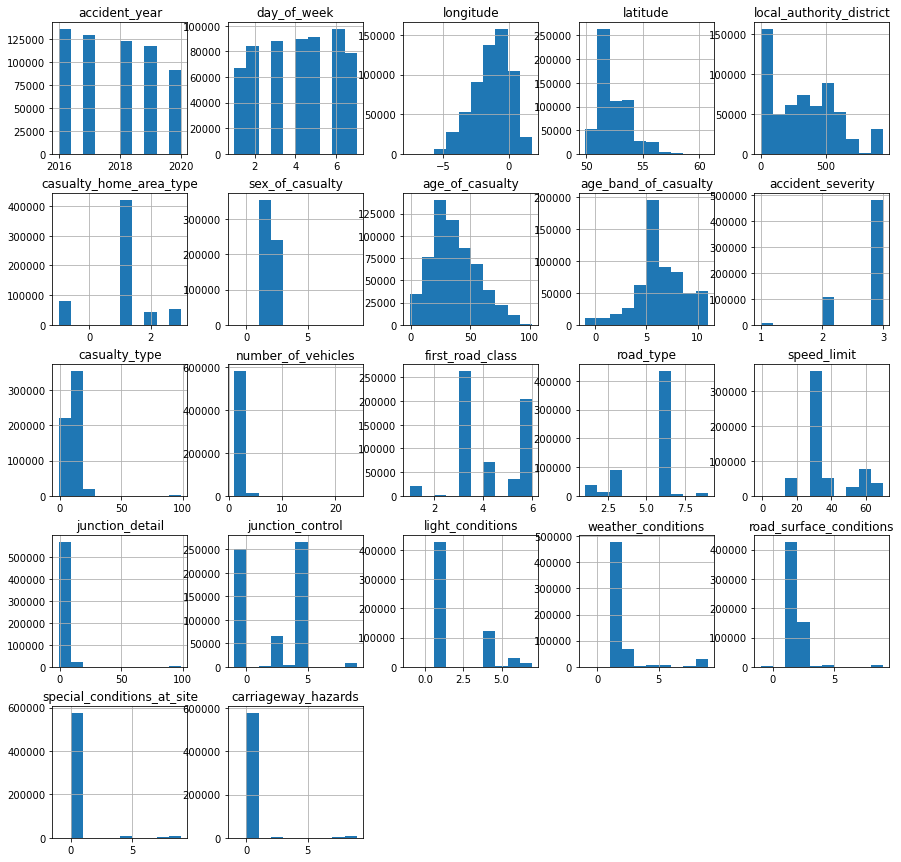

In [24]:
data.hist(figsize=(15,15))

<AxesSubplot:title={'center':'HEATMAP OF MISSING VALUES'}>

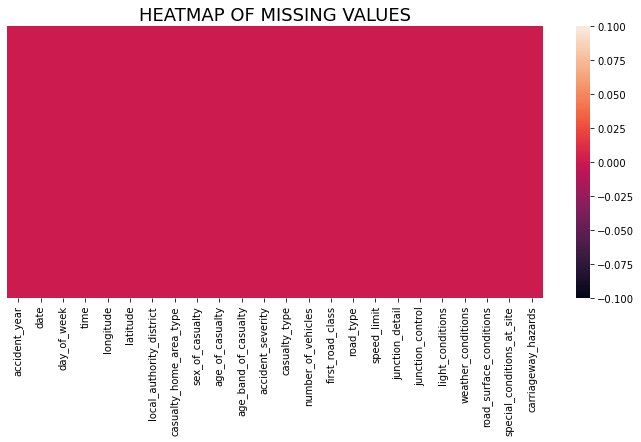

In [25]:
plt.figure(figsize=(12,5))
plt.title('HEATMAP OF MISSING VALUES', fontsize=18)
sns.heatmap(data.isnull(), yticklabels=False)

### Time

(array([67036., 84336.,     0., 88376.,     0., 89902., 91412.,     0.,
        97756., 78985.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

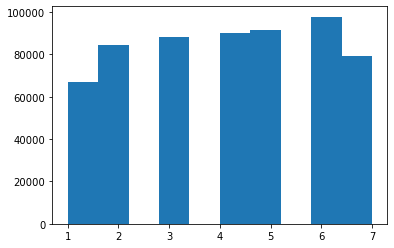

In [26]:
plt.hist(data['day_of_week'])

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

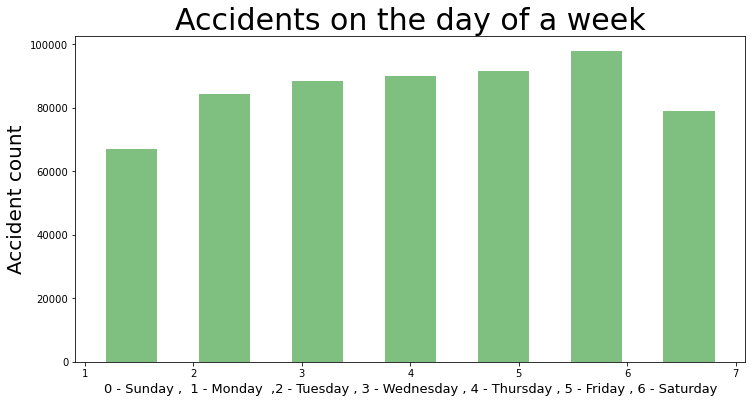

In [27]:
plt.figure(figsize=(12,6))
data['day_of_week'].hist(bins=7,rwidth=0.55,alpha=0.5, color= 'Green')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 13)

In [28]:
acc_time = data[['date','day_of_week','time','local_authority_district']]

In [29]:
acc_time.head()

,date,day_of_week,time,local_authority_district
0,1/11/2016,3,2:30,28
1,1/11/2016,3,0:37,18
2,1/11/2016,3,1:25,26
3,1/11/2016,3,9:15,22
4,1/11/2016,3,7:53,25


In [30]:
acc_time.rename(columns={'date':'Date','day_of_week':'Day_of_Week','time':'Time'},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [31]:
acc_time.dropna(axis=0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [32]:
acc_time.columns

Index(['Date', 'Day_of_Week', 'Time', 'local_authority_district'], dtype='object')

In [33]:
def year(string):
    return int(string.split('/')[-1])
acc_time['Year']=acc_time['Date'].apply(lambda x: year(x))
#creating month column
def month(string):
    return int(string.split('/')[1])
acc_time['Month']=acc_time['Date'].apply(lambda x: month(x))
#creating day column
def day(string):
    return int(string.split('/')[0])
acc_time['Day']=acc_time['Date'].apply(lambda x: day(x))
#creating hour column
def hour(string):
    s=string.split(':')[0]
    return int(s)
acc_time['Hour']=acc_time['Time'].apply(lambda x: hour(x))

C:\Users\mdasi\AppData\Local\Temp/ipykernel_7032/2820701318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_time['Year']=acc_time['Date'].apply(lambda x: year(x))
C:\Users\mdasi\AppData\Local\Temp/ipykernel_7032/2820701318.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_time['Month']=acc_time['Date'].apply(lambda x: month(x))
C:\Users\mdasi\AppData\Local\Temp/ipykernel_7032/2820701318.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

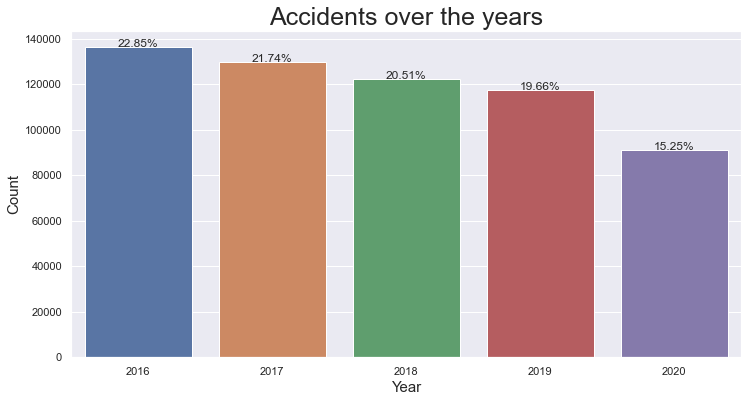

In [34]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.title('Accidents over the years',fontsize=25)
plt.ylabel('Number of casualties' , fontsize = 15)
plt.xlabel('year', fontsize = 15)
yearplot = sns.countplot(x='Year',data=acc_time)
yearplot.set(xlabel='Year', ylabel='Count')
for p in yearplot.patches: 
    height = p.get_height() 
    yearplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.show()

In [35]:
xx=acc_time.groupby('Month').size()
xx

Month
1     51895
2     47013
3     46530
4     41588
5     48798
6     49827
7     52684
8     49840
9     52620
10    52885
11    54392
12    49731
dtype: int64

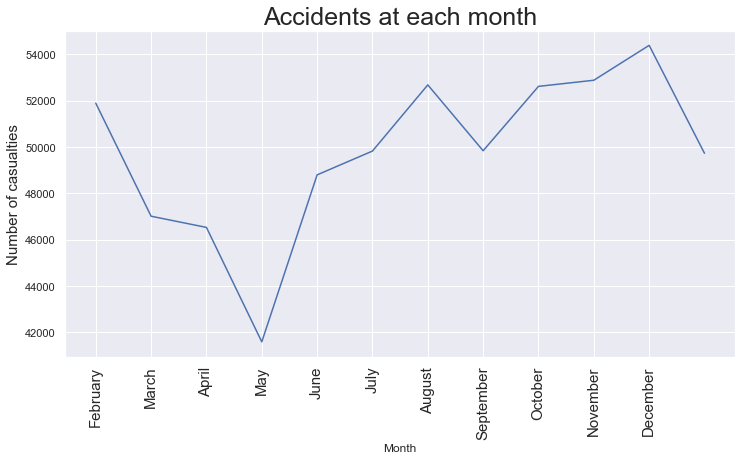

In [36]:
objects=['January','February','March','April','May','June','July','August','September','October','November','December']
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.title('Accidents at each month',fontsize=25)
plt.ylabel('Number of casualties' , fontsize = 15)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects,fontsize=15, rotation=90)
monthh=sns.lineplot(data=xx, x=xx.index,y=acc_time.groupby('Month').size(),markers='*')
plt.show()

ValueError: array length 597803 does not match index length 1827

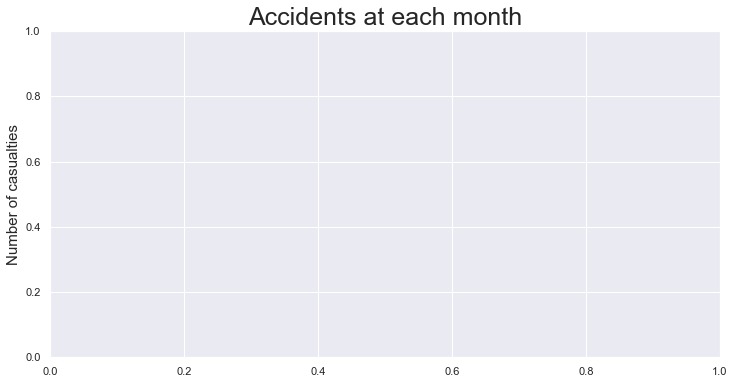

In [37]:
objects=['January','February','March','April','May','June','July','August','September','October','November','December']
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.title('Accidents at each month',fontsize=25)
plt.ylabel('Number of casualties' , fontsize = 15)
monthh=sns.lineplot(data=acc_time, x=acc_time.index,y=acc_time.groupby('Date').size(),markers='*')
plt.show()

In [38]:
x=data.groupby('date').agg({'accident_severity':np.count_nonzero})
x

,accident_severity
date,
1/1/2016,282
1/1/2017,241
1/1/2018,234
1/1/2019,231
1/1/2020,196
...,...
9/9/2016,421
9/9/2017,382
9/9/2018,265


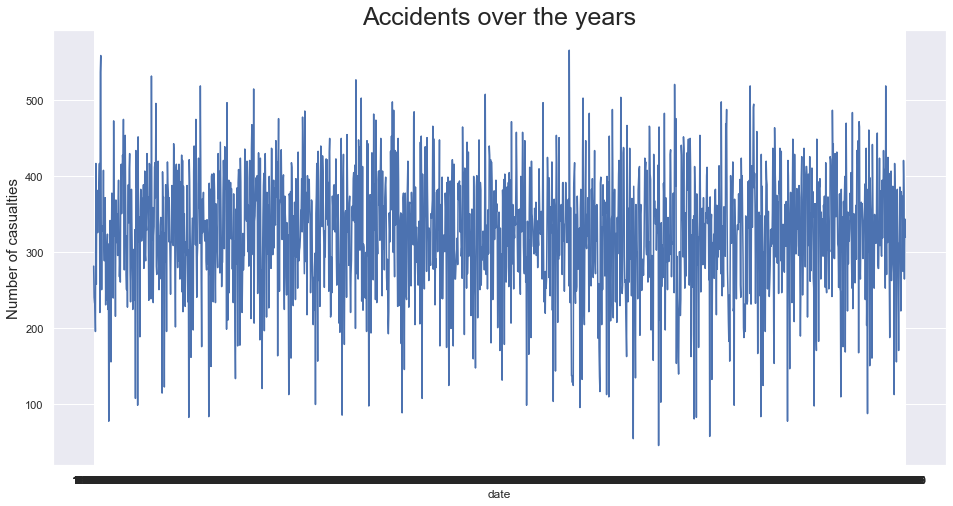

In [39]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,8))
plt.title('Accidents over the years',fontsize=25)
plt.ylabel('Number of casualties' , fontsize = 15)
monthh=sns.lineplot(data=x, x=x.index,y=x['accident_severity'])
plt.show()

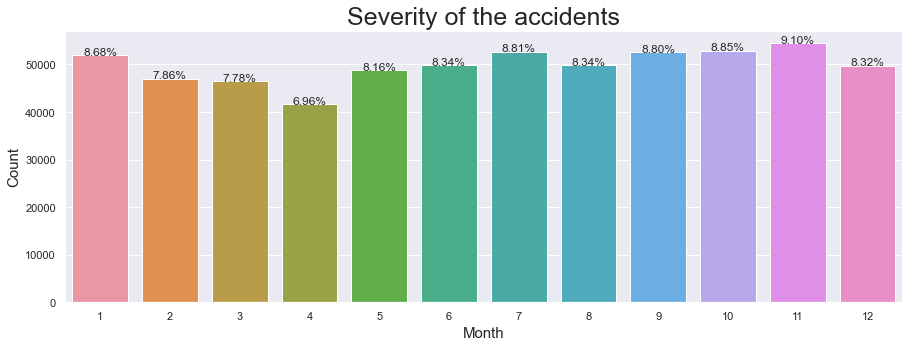

In [40]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
plt.title('Severity of the accidents',fontsize=25)
plt.ylabel('Number of casualties' , fontsize = 15)
plt.xlabel('Severity', fontsize = 15)
monthplot = sns.countplot(x='Month',data=acc_time)
monthplot.set(xlabel='Month', ylabel='Count')
for p in monthplot.patches: 
    height = p.get_height() 
    monthplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.show()

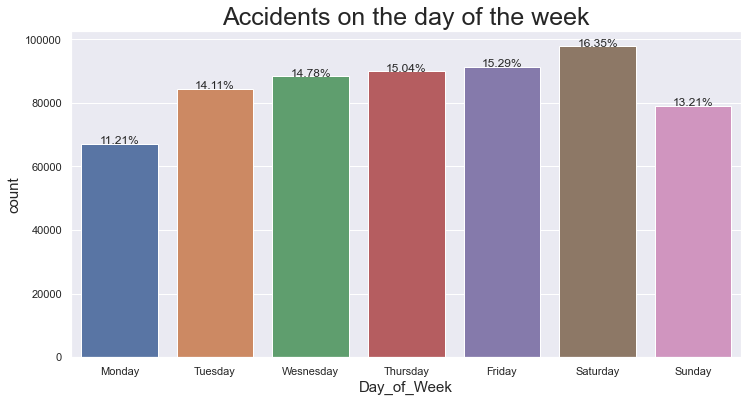

In [41]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.title('Accidents on the day of the week',fontsize=25)
plt.ylabel('Number of casualties' , fontsize = 15)
plt.xlabel('Weekdays', fontsize = 15)
weekplot = sns.countplot(x='Day_of_Week',data=acc_time)
for p in weekplot.patches: 
    height = p.get_height() 
    weekplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
weekplot.set(xticklabels=['Monday','Tuesday','Wesnesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

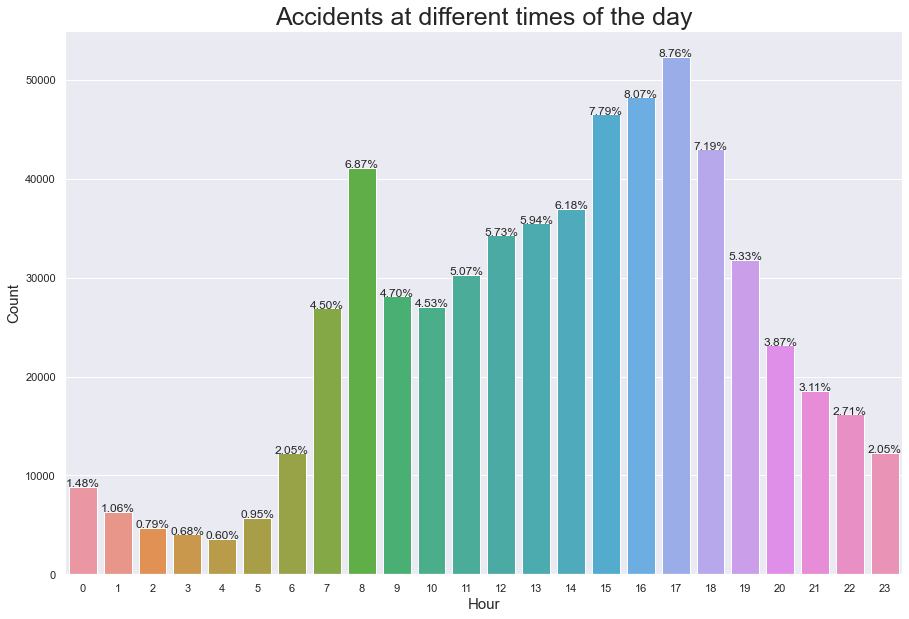

In [42]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))
plt.title('Accidents at different times of the day',fontsize=25)
plt.ylabel('Number of casualties' , fontsize = 15)
plt.xlabel('Time of the day', fontsize = 15)
Hourplot = sns.countplot(x='Hour',data=acc_time)
Hourplot.set(xlabel='Hour', ylabel='Count')
for p in Hourplot.patches: 
    height = p.get_height() 
    Hourplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.show()

C:\Users\mdasi\AppData\Local\Temp/ipykernel_7032/7994104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_time['Ones']=1


<AxesSubplot:xlabel='Year', ylabel='Month'>

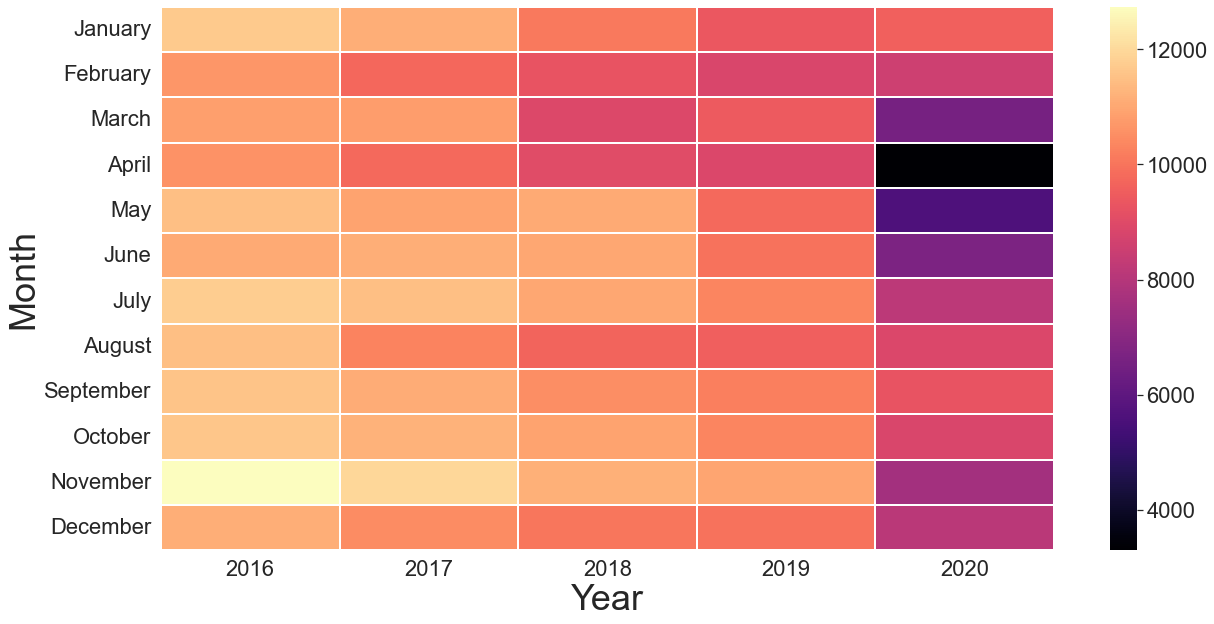

In [43]:
acc_time['Ones']=1
table = pd.pivot_table(acc_time, values='Ones', index=['Month'],columns=['Year'], aggfunc=np.sum)
plt.figure(figsize=(20,10))
yticks = np.array(['January','February','March','April','May','June','July','August','September','October','November','December'])
sns.set(rc={"axes.labelsize":36},font_scale=2)
sns.heatmap(table, yticklabels=yticks,linewidths=.1,annot=False,cmap='magma')

### People

Text(0.5, 0, 'Age of Drivers')

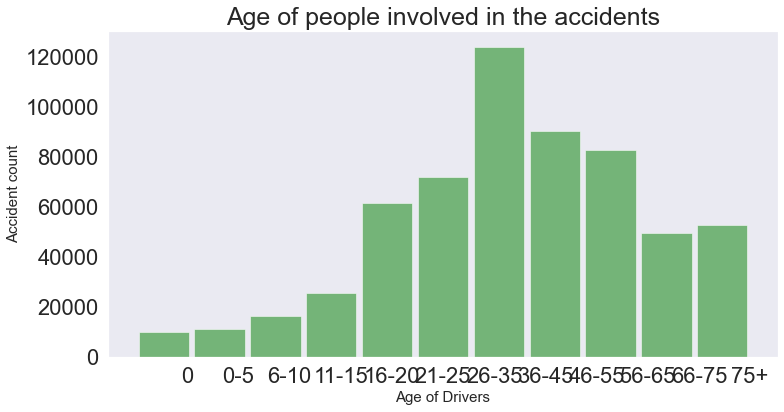

In [44]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35',
          '36-45', '46-55','56-65','66-75','75+']

plt.figure(figsize=(12,6))
data.age_band_of_casualty.hist(bins = 11,alpha=0.5,rwidth=0.90, color= 'green',)
plt.title('Age of people involved in the accidents', fontsize = 25)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

In [45]:
#Turning the variable into a categorical one
def map_age(age):
    if age == 1:
        return '0-5'
    elif age == 2:
        return '6-10'
    elif age == 3:
        return '11-15'
    elif age == 4:
        return '16-20'
    elif age == 5:
        return '21-25'
    elif age == 6:
        return '26-35'
    elif age == 7:
        return '36-45'
    elif age == 8:
        return '46-55'
    elif age == 9:
        return '56-65'
    elif age == 10:
        return '66-75'
    elif age == 11:
        return 'over 75'
    elif age == -1:
        return "Don't know"
    

data['age_band_of_casualty'] = data['age_band_of_casualty'].apply(map_age)

Text(0.5, 0, 'Age of Drivers')

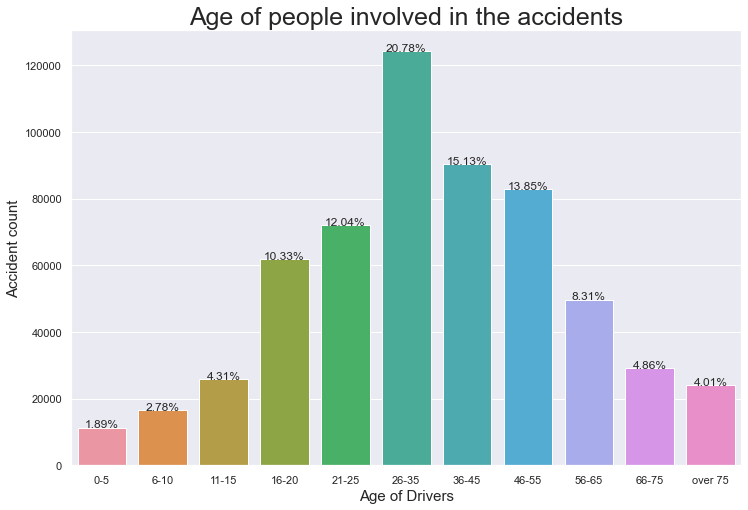

In [46]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
plt.title('Age of people involved in the accidents', fontsize = 25)
ageplot=sns.countplot(x='age_band_of_casualty',data=data,order=['0-5','6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','over 75'])
for p in ageplot.patches: 
    height = p.get_height() 
    ageplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(data))*100)+'%',  
      ha="center") 
plt.ylabel('Accident count' , fontsize = 15)
plt.xlabel('Age of Drivers', fontsize = 15,)

In [47]:
data['sex_of_casualty'].unique()

array([ 1,  2, -1,  9], dtype=int64)

In [48]:
data=data[(data['sex_of_casualty']!=-1) & (data['sex_of_casualty']!=9)]
data['sex_of_casualty'].unique()

array([1, 2], dtype=int64)

In [49]:
def map_sex(sex):
    if sex==1:
        return 'Male'
    else:
        return 'Female'
data['sex_of_casualty']=data['sex_of_casualty'].apply(map_sex)

In [50]:
data['sex_of_casualty'].unique()

array(['Male', 'Female'], dtype=object)

Text(0.5, 0, 'Count')

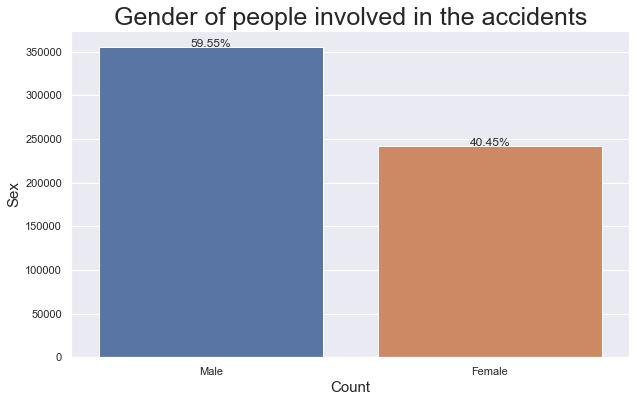

In [51]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,6))
plt.title('Gender of people involved in the accidents', fontsize = 25)
genderplot=sns.countplot(x='sex_of_casualty',data=data)
for p in genderplot.patches:
    h=p.get_height()
    genderplot.text(p.get_x()+p.get_width()/2.,h+3,
                   '{:1.2f}'.format((h/len(data))*100)+'%',ha='center')
plt.ylabel('Sex' , fontsize = 15)
plt.xlabel('Count', fontsize = 15,)

### Location

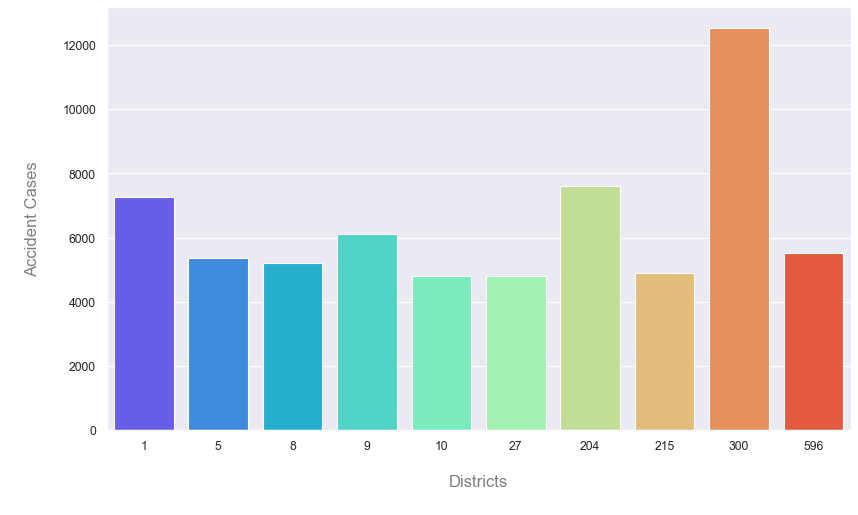

In [52]:
district=pd.DataFrame(data['local_authority_district'].value_counts()).reset_index().rename(columns={'index':'local_authority_district', 'local_authority_district':'Cases'})
top_10_dis=pd.DataFrame(district.head(10))

fig, ax = plt.subplots(figsize = (12,7), dpi = 80)

ax=sns.barplot(y=top_10_dis['Cases'], x=top_10_dis['local_authority_district'], palette='rainbow')

ax.set_xlabel('\nDistricts\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

plt.show()

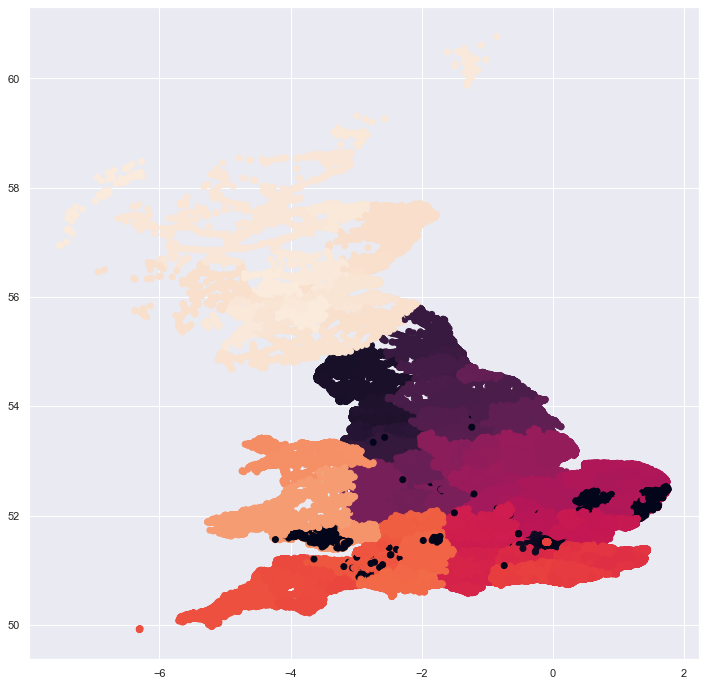

In [53]:
plt.figure(figsize=(12,12))
plt.scatter(data['longitude'],data['latitude'],c=data['local_authority_district'])

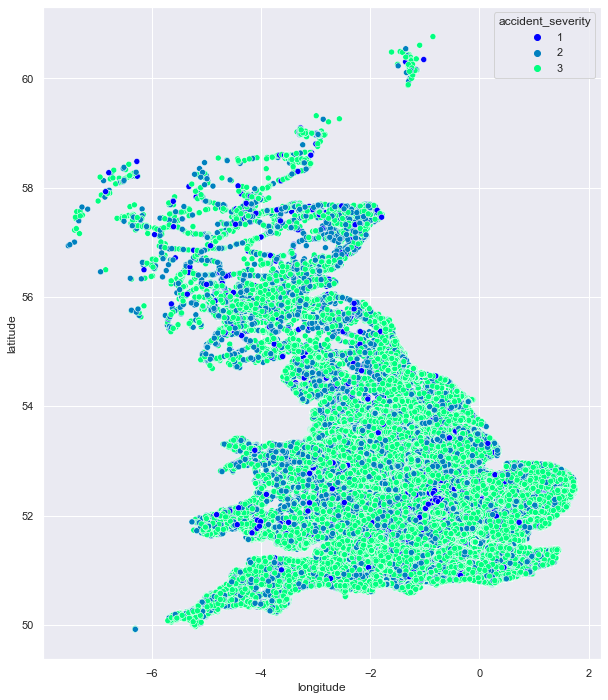

In [54]:
plt.figure(figsize=(10,12))
sns.scatterplot(data=data, x = "longitude", y = "latitude", hue = "accident_severity", palette = "winter")
plt.show()

In [55]:
data=data[(data['casualty_home_area_type']!=-1)]
data['casualty_home_area_type'].unique()

array([1, 3, 2], dtype=int64)

In [56]:
def map_area(area):
    if area==1:
        return 'Urban area'
    elif area==2:
        return 'Small Town'
    elif area==3:
        return 'Rural area'
data['casualty_home_area_type']=data['casualty_home_area_type'].apply(map_area)

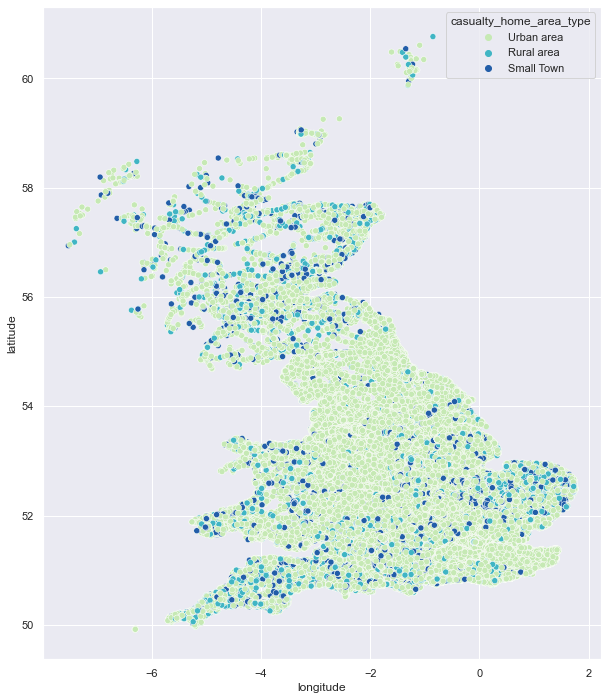

In [57]:
plt.figure(figsize=(10,12))
sns.scatterplot(data=data, x = "longitude", y = "latitude", hue = 'casualty_home_area_type', palette = "YlGnBu")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

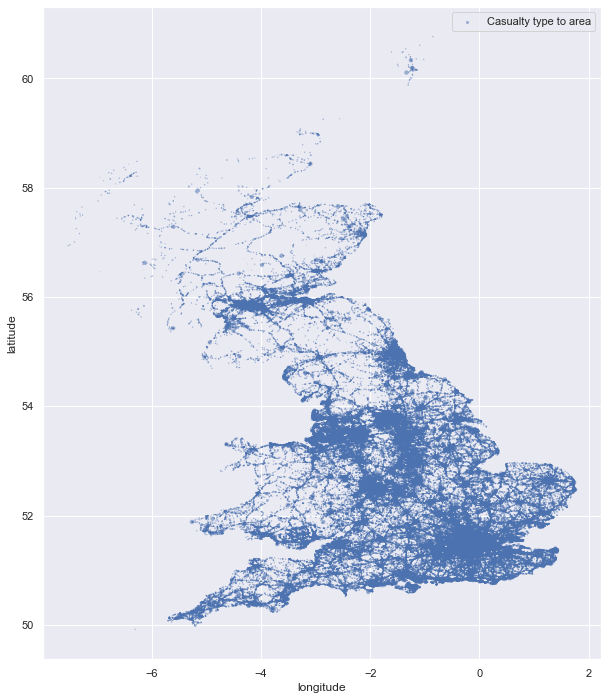

In [58]:
plt.figure(figsize=(10,12))
sns.scatterplot(data=data,x = "longitude", y = "latitude", alpha = 0.5,
             s = data['casualty_type']/5,label='Casualty type to area', cmap = plt.get_cmap("YlGnBu"))

### Severity

In [59]:
data['accident_severity'].unique()

array([3, 2, 1], dtype=int64)

In [60]:
def map_severity(severity):
    if severity == 1:
        return 'Fatal'
    elif severity == 2:
        return 'Serious'
    elif severity == 3:
        return 'Slight'
    
data['accident_severity'] = data['accident_severity'].apply(map_severity)

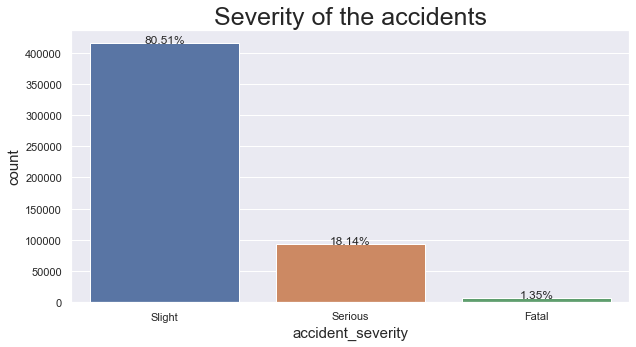

In [61]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
plt.title('Severity of the accidents',fontsize=25)
plt.ylabel('Number of casualties' , fontsize = 15)
plt.xlabel('Severity', fontsize = 15,)
severityplot = sns.countplot(x='accident_severity',data=data,order=['Slight','Serious','Fatal'])
for p in severityplot.patches: 
    height = p.get_height() 
    severityplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(data))*100)+'%',  
      ha="center") 

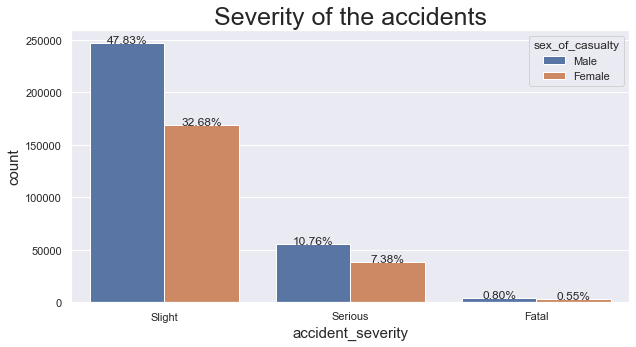

In [62]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
plt.title('Severity of the accidents',fontsize=25)
plt.ylabel('Number of casualties' , fontsize = 15)
plt.xlabel('Severity', fontsize = 15)
severityplot = sns.countplot(x='accident_severity',hue='sex_of_casualty',data=data,order=['Slight','Serious','Fatal'])
for p in severityplot.patches: 
    height = p.get_height() 
    severityplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(data))*100)+'%',  
      ha="center") 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


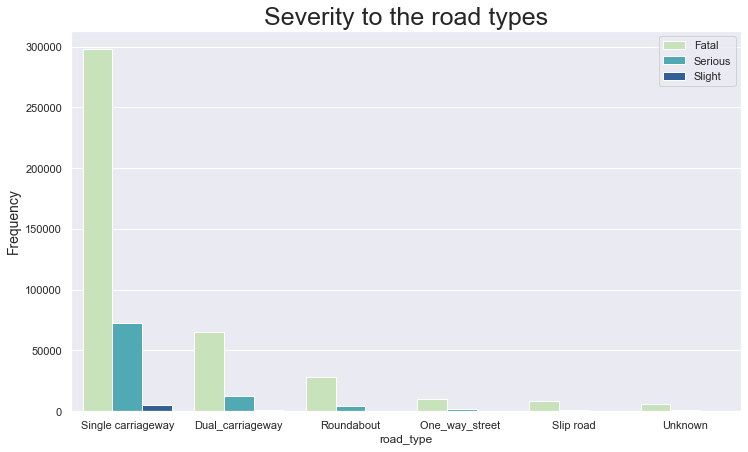

In [63]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,7))
plt.title('Severity to the road types',fontsize=25)
ax = sns.countplot('road_type',hue='accident_severity',data=data, 
                   order = data["road_type"].value_counts().index, palette = "YlGnBu")
ax.set_xticklabels(['Single carriageway','Dual_carriageway','Roundabout',
                    'One_way_street ',
                    'Slip road','Unknown'])
plt.legend(['Fatal','Serious','Slight'])
plt.ylabel("Frequency", fontsize = 14)
plt.show()

### Weather conditions

In [64]:
data=data[data['light_conditions']!=-1]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


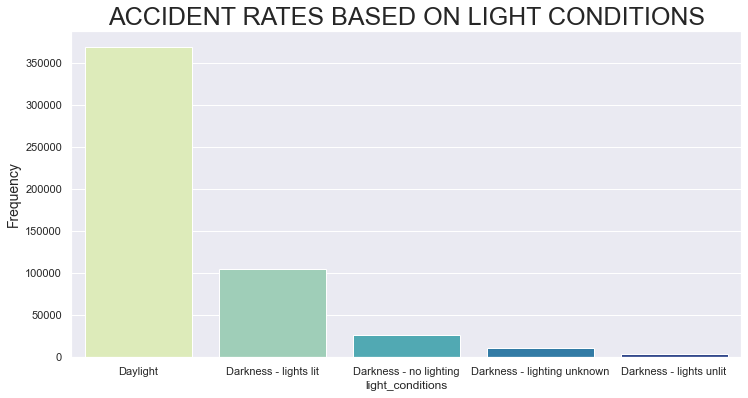

In [65]:
plt.figure(figsize=(12,6))
ax=sns.countplot('light_conditions',data=data,
                 order = data["light_conditions"].value_counts().index,
                 palette = "YlGnBu") 
ax.set_xticklabels(['Daylight','Darkness - lights lit',
                    'Darkness - no lighting',
                    'Darkness - lighting unknown',
                    'Darkness - lights unlit'])
plt.title('ACCIDENT RATES BASED ON LIGHT CONDITIONS',fontsize=25)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

In [66]:
df_conditions = data[['light_conditions','weather_conditions','road_surface_conditions','special_conditions_at_site', 'carriageway_hazards']]

In [67]:
df_conditions['weather_conditions'].unique()

array([ 1,  2,  7,  8,  9,  4,  5,  3,  6, -1], dtype=int64)

In [68]:
df_conditions=df_conditions[df_conditions['weather_conditions']!=-1]

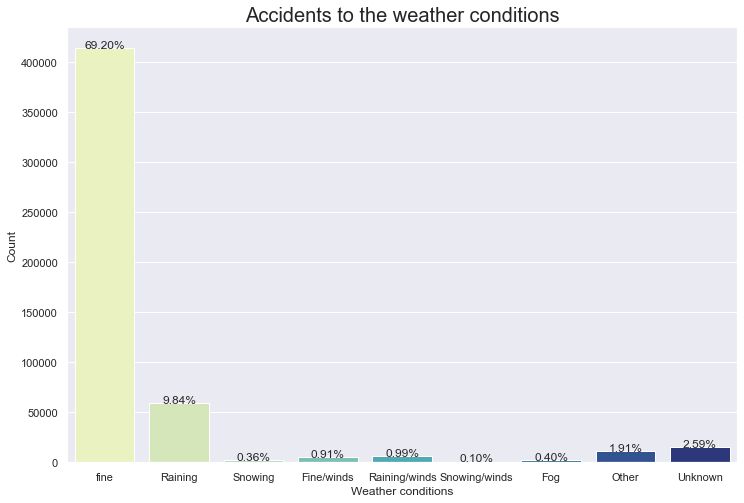

In [69]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
weatherplot = sns.countplot(x='weather_conditions',data=df_conditions,palette = "YlGnBu")
weatherplot.set(xlabel='Weather conditions', ylabel='Count',xticklabels=['fine','Raining','Snowing','Fine/winds',
                                                                         'Raining/winds','Snowing/winds','Fog','Other','Unknown'])
for p in weatherplot.patches: 
    height = p.get_height() 
    weatherplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.title('Accidents to the weather conditions',fontsize=20)
plt.show()

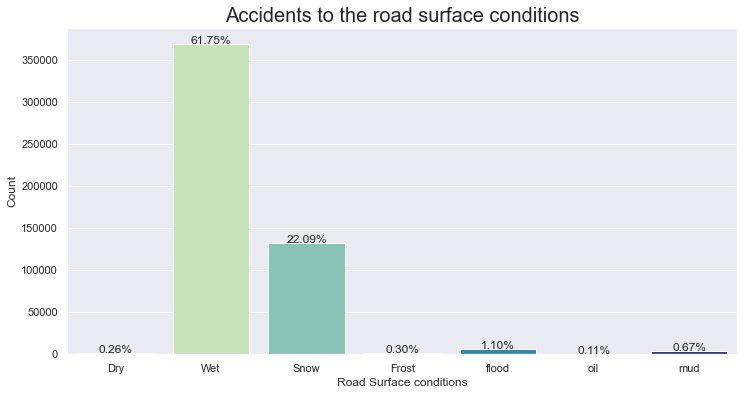

In [70]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
roadplot = sns.countplot(x='road_surface_conditions',data=df_conditions,palette = "YlGnBu")
roadplot.set(xlabel='Road Surface conditions', ylabel='Count',xticklabels=['Dry','Wet','Snow','Frost','flood','oil','mud'])
for p in roadplot.patches: 
    height = p.get_height() 
    roadplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.title('Accidents to the road surface conditions',fontsize=20)
plt.show()

<AxesSubplot:xlabel='road_surface_conditions', ylabel='light_conditions'>

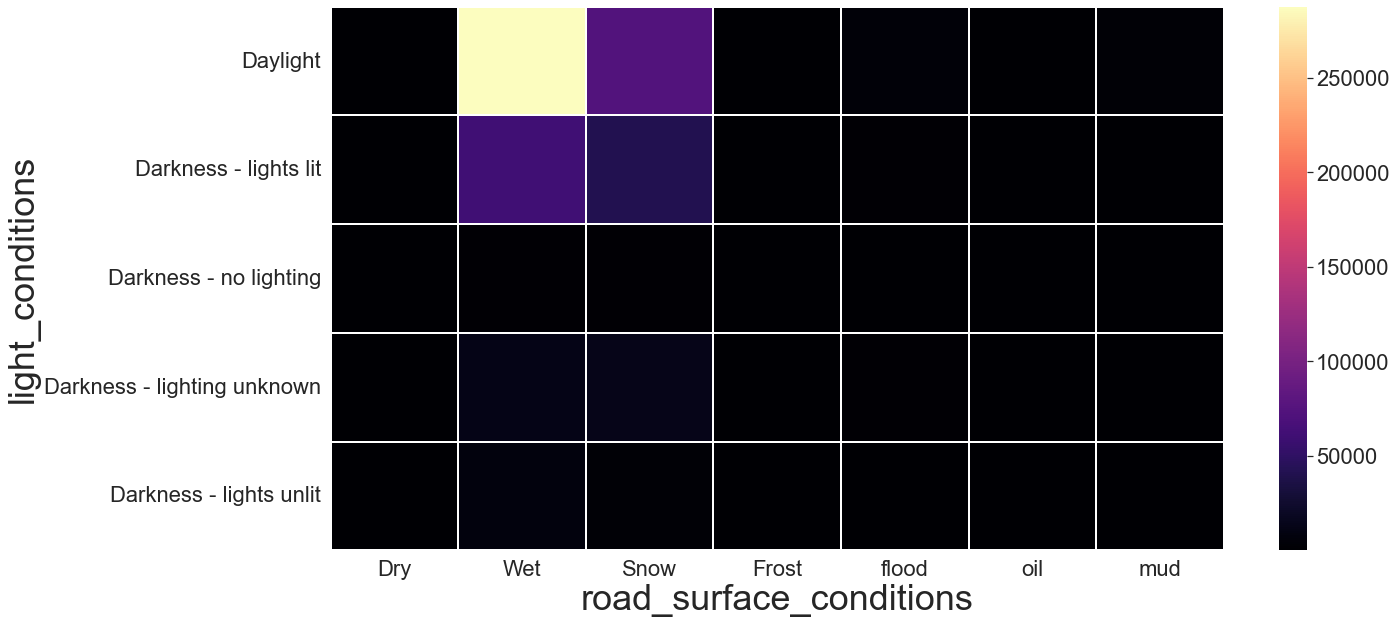

In [71]:
df_conditions['Ones']=1
table = pd.pivot_table(df_conditions, values='Ones', index=['light_conditions'],columns=['road_surface_conditions'], aggfunc=np.sum)
plt.figure(figsize=(20,10))
yticks = np.array(['Daylight','Darkness - lights lit','Darkness - no lighting','Darkness - lighting unknown','Darkness - lights unlit'])
xticks = np.array(['Dry','Wet','Snow','Frost','flood','oil','mud'])
sns.set(rc={"axes.labelsize":36},font_scale=2)
sns.heatmap(table, yticklabels=yticks,xticklabels=xticks,linewidths=.1,annot=False,cmap='magma')

In [72]:
data=data[data['special_conditions_at_site']!=-1]

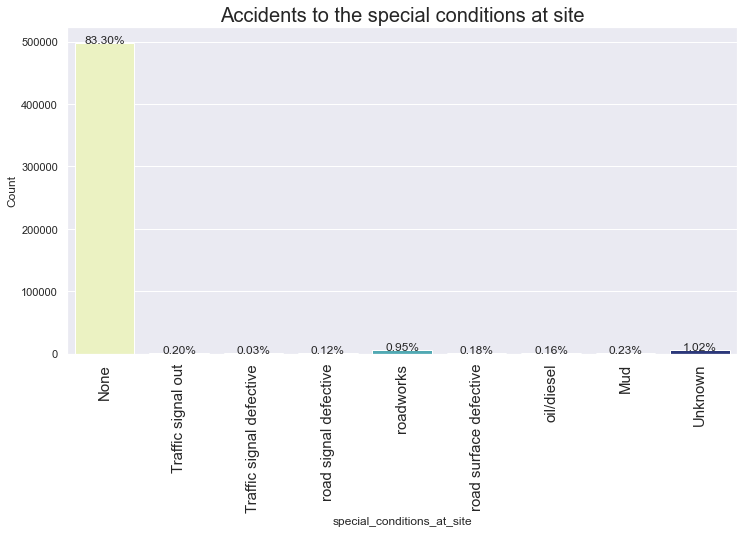

In [73]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
roadplot = sns.countplot(x='special_conditions_at_site',data=data,palette = "YlGnBu")
roadplot.set(xlabel='special_conditions_at_site', ylabel='Count',xticklabels=['None','Traffic signal out','Traffic signal defective','road signal defective','roadworks','road surface defective','oil/diesel','Mud','Unknown'])
for p in roadplot.patches: 
    height = p.get_height() 
    roadplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.title('Accidents to the special conditions at site',fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.show()

In [74]:
data=data[data['carriageway_hazards']!=-1]

In [75]:
data['carriageway_hazards'].unique()

array([0, 2, 6, 1, 9, 7, 3], dtype=int64)

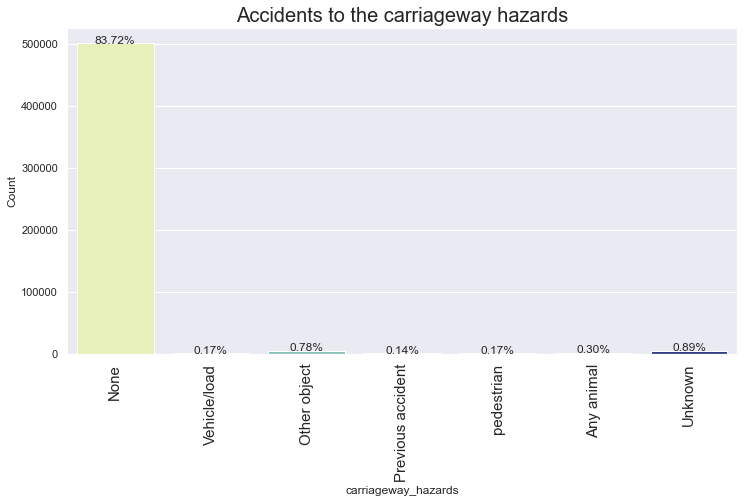

In [76]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
roadplot = sns.countplot(x='carriageway_hazards',data=data,palette = "YlGnBu")
roadplot.set(xlabel='carriageway_hazards', ylabel='Count',xticklabels=['None','Vehicle/load','Other object','Previous accident','pedestrian','Any animal','Unknown'])
for p in roadplot.patches: 
    height = p.get_height() 
    roadplot.text(p.get_x()+p.get_width()/2., 
      height + 3, 
      '{:1.2f}'.format((height/len(acc_time))*100)+'%',  
      ha="center") 
plt.title('Accidents to the carriageway hazards',fontsize=20)
plt.xticks(rotation=90,fontsize=15)
plt.show()

# Inferential Statistics

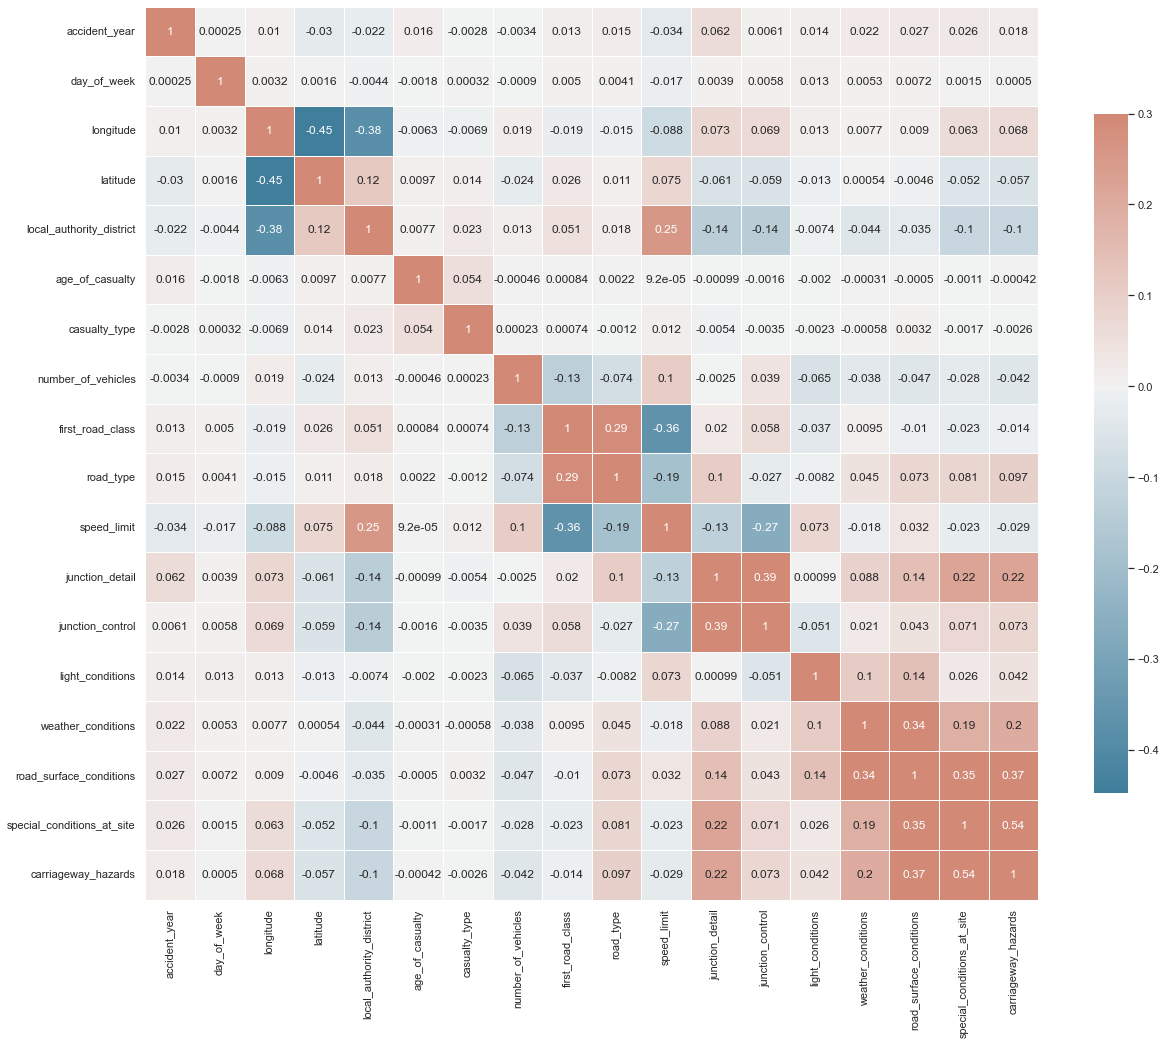

In [78]:
d1=data[['accident_year','date','day_of_week']]
correlation=data.corr()

mask=np.triu(np.ones_like(correlation, dtype=bool))

f,ax=plt.subplots(figsize=(20,25))
sns.set_style("white")
cmap=sns.diverging_palette(230,20,as_cmap=True)
heatmap=sns.heatmap(correlation,cmap=cmap,vmax=.3,center=0,
                   square=True,linewidth=.5,cbar_kws={"shrink":.5},
                   annot=True,annot_kws={"size":12})
sns.set_style({'xtick.bottom':True},{'ytick.left':True})

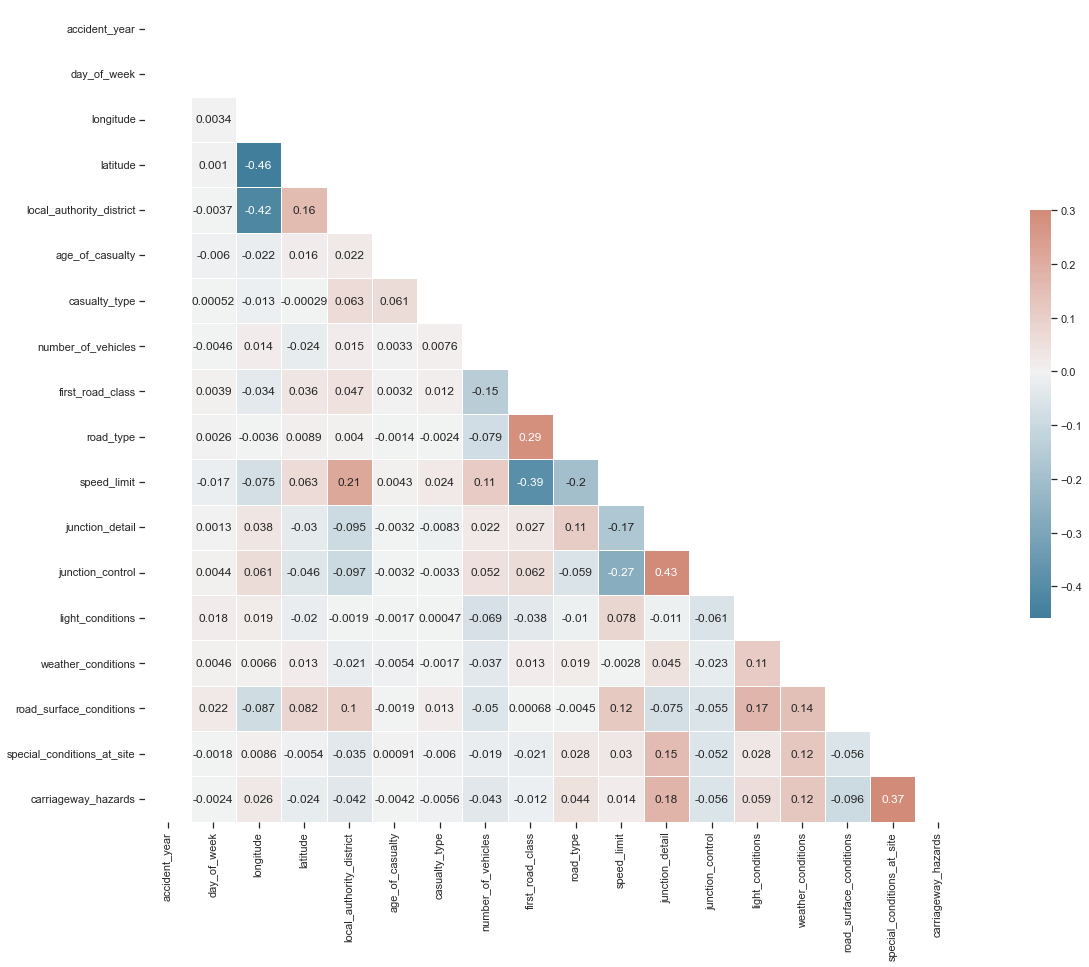

In [79]:
d1=data[data['accident_year']==2016]
correlation=d1.corr()

mask=np.triu(np.ones_like(correlation, dtype=bool))

f,ax=plt.subplots(figsize=(25,15))
sns.set_style("white")
cmap=sns.diverging_palette(230,20,as_cmap=True)
heatmap=sns.heatmap(correlation,mask=mask,cmap=cmap,vmax=.3,center=0,
                   square=True,linewidth=.5,cbar_kws={"shrink":.5},
                   annot=True,annot_kws={"size":12})
sns.set_style({'xtick.bottom':True},{'ytick.left':True})
heatmap.get_figure().savefig('/t_y_2016.png',bbox_inches='tight')

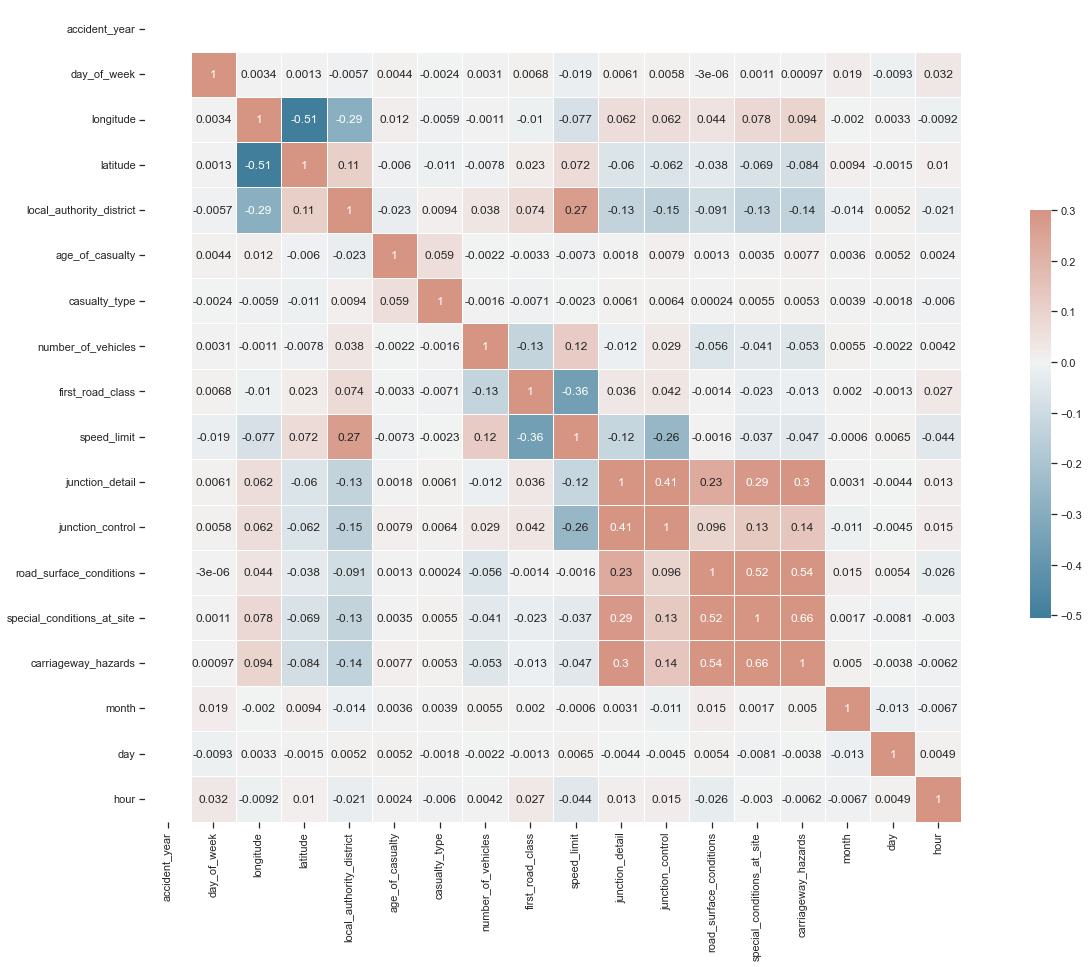

In [194]:
d1=data[data['accident_year']==2017]
correlation=d1.corr()

mask=np.triu(np.ones_like(correlation, dtype=bool))

f,ax=plt.subplots(figsize=(25,15))
sns.set_style("white")
cmap=sns.diverging_palette(230,20,as_cmap=True)
heatmap=sns.heatmap(correlation,cmap=cmap,vmax=.3,center=0,
                   square=True,linewidth=.5,cbar_kws={"shrink":.5},
                   annot=True,annot_kws={"size":12})
sns.set_style({'xtick.bottom':True},{'ytick.left':True})
heatmap.get_figure().savefig('/t_y_2016.png',bbox_inches='tight')

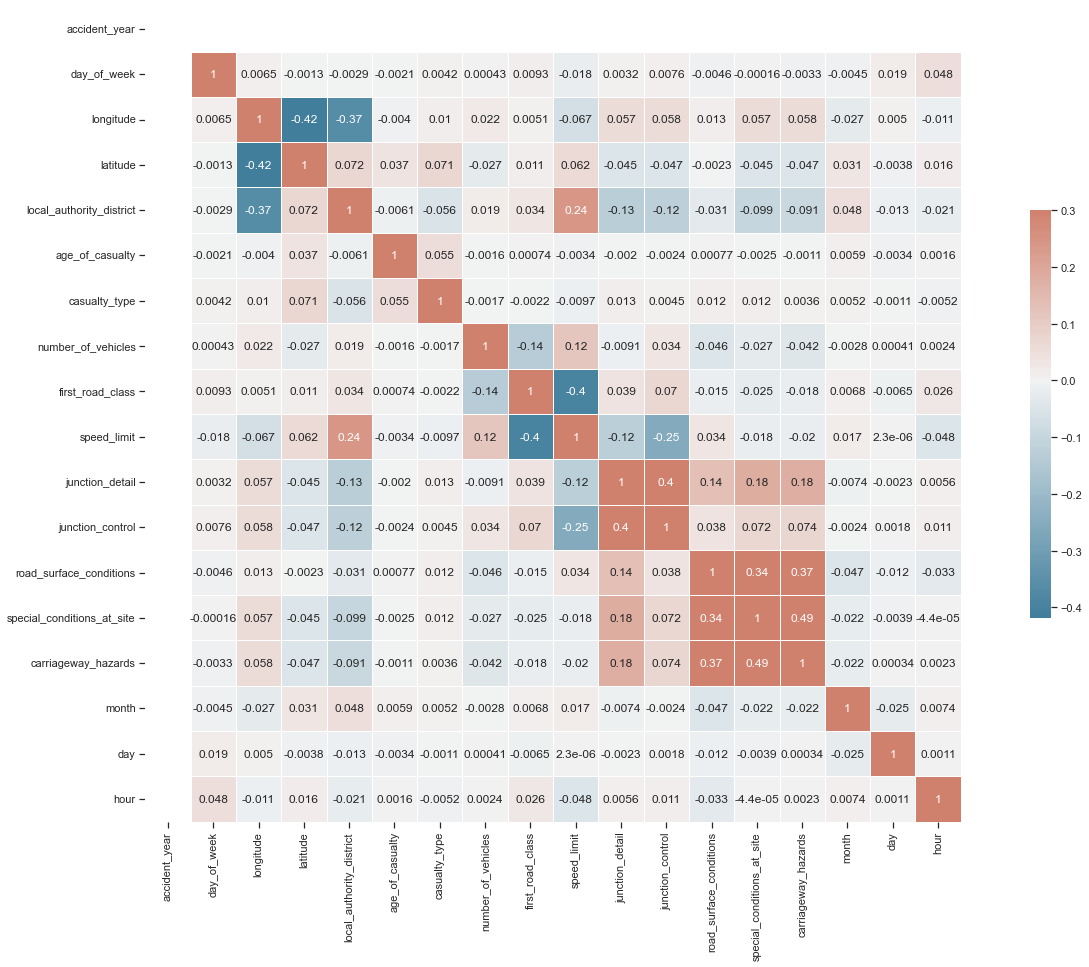

In [195]:
d1=data[data['accident_year']==2018]
correlation=d1.corr()

mask=np.triu(np.ones_like(correlation, dtype=bool))

f,ax=plt.subplots(figsize=(25,15))
sns.set_style("white")
cmap=sns.diverging_palette(230,20,as_cmap=True)
heatmap=sns.heatmap(correlation,cmap=cmap,vmax=.3,center=0,
                   square=True,linewidth=.5,cbar_kws={"shrink":.5},
                   annot=True,annot_kws={"size":12})
sns.set_style({'xtick.bottom':True},{'ytick.left':True})
heatmap.get_figure().savefig('/t_y_2016.png',bbox_inches='tight')

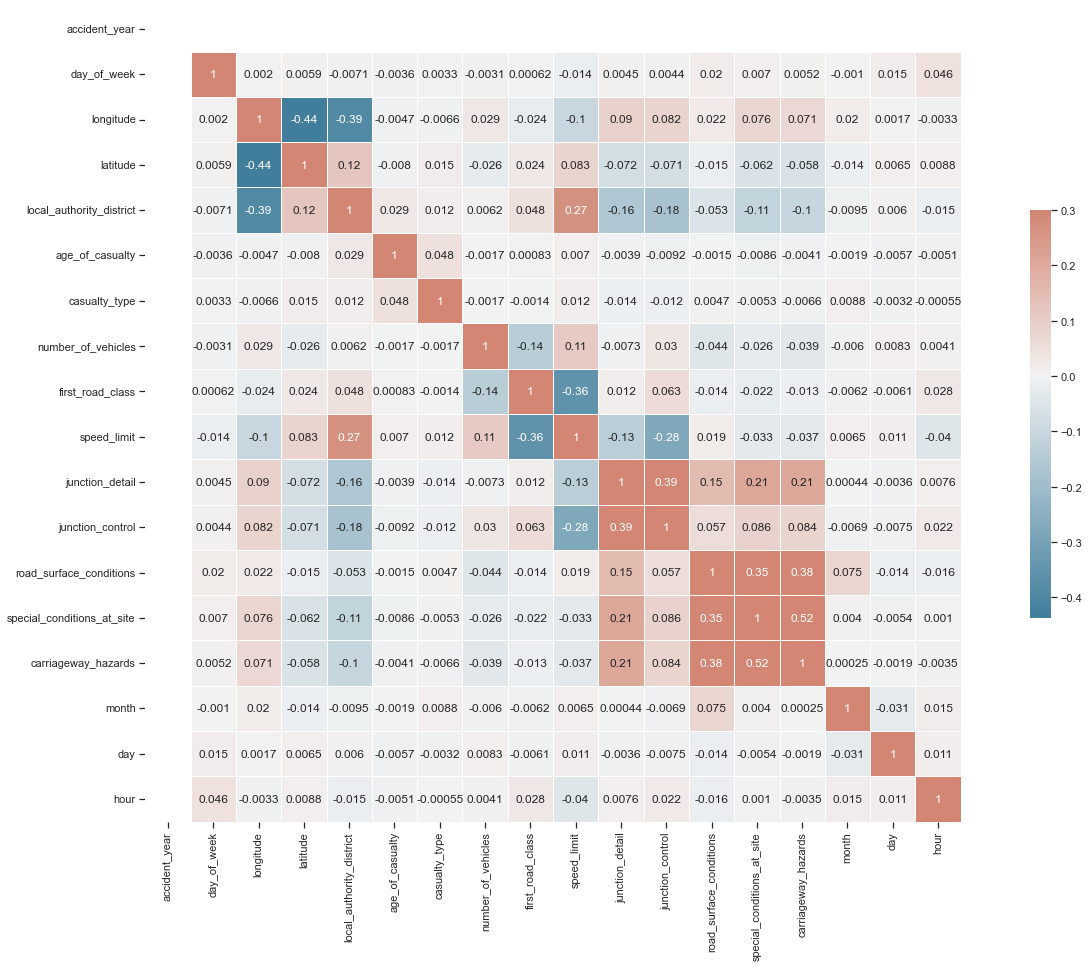

In [196]:
d1=data[data['accident_year']==2019]
correlation=d1.corr()

mask=np.triu(np.ones_like(correlation, dtype=bool))

f,ax=plt.subplots(figsize=(25,15))
sns.set_style("white")
cmap=sns.diverging_palette(230,20,as_cmap=True)
heatmap=sns.heatmap(correlation,cmap=cmap,vmax=.3,center=0,
                   square=True,linewidth=.5,cbar_kws={"shrink":.5},
                   annot=True,annot_kws={"size":12})
sns.set_style({'xtick.bottom':True},{'ytick.left':True})
heatmap.get_figure().savefig('/t_y_2016.png',bbox_inches='tight')

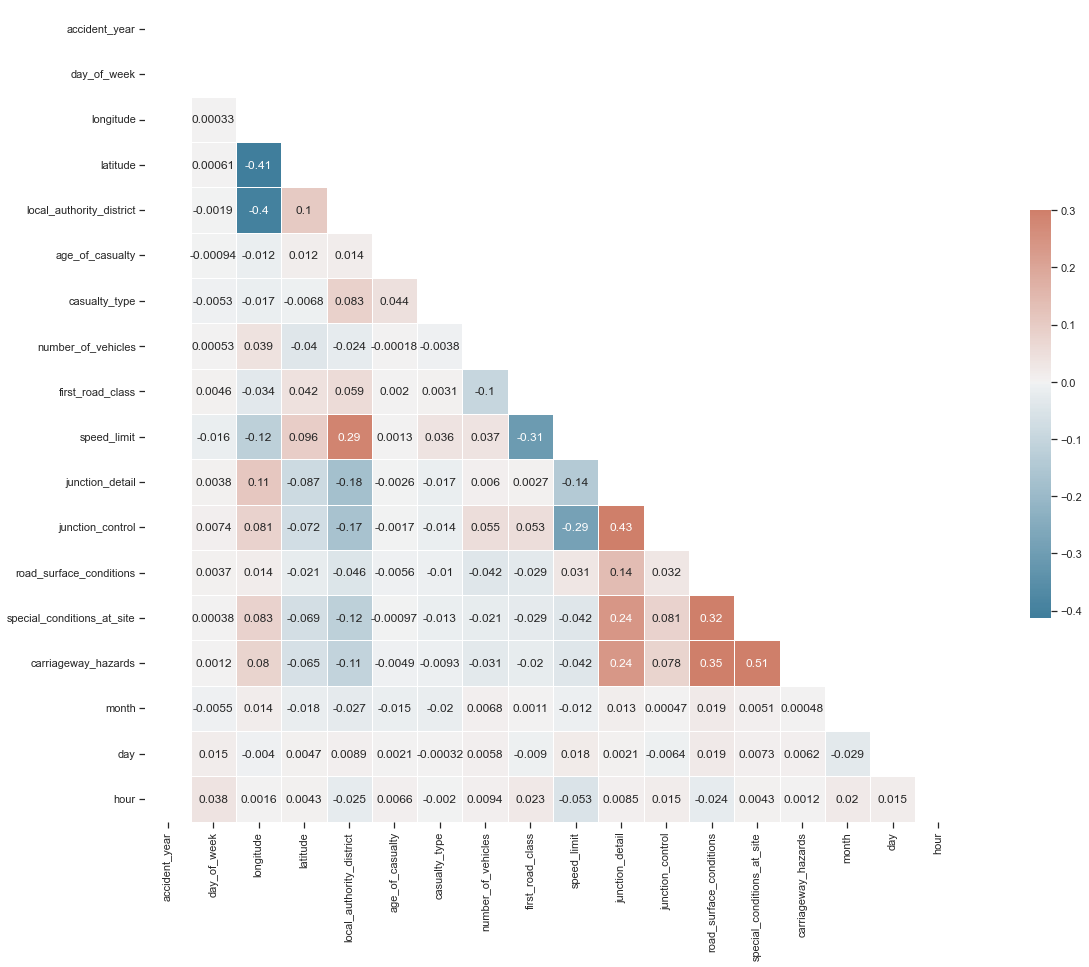

In [199]:
d1=data[data['accident_year']==2020]
correlation=d1.corr()

mask=np.triu(np.ones_like(correlation, dtype=bool))

f,ax=plt.subplots(figsize=(25,15))
sns.set_style("white")
cmap=sns.diverging_palette(230,20,as_cmap=True)
heatmap=sns.heatmap(correlation,mask=mask,cmap=cmap,vmax=.3,center=0,
                   square=True,linewidth=.5,cbar_kws={"shrink":.5},
                   annot=True,annot_kws={"size":12})
sns.set_style({'xtick.bottom':True},{'ytick.left':True})
heatmap.get_figure().savefig('/t_y_2016.png',bbox_inches='tight')

## T-test

In [85]:
def year(string):
    return int(string.split('/')[-1])
data['Year']=data['date'].apply(lambda x: year(x))
#creating month column

In [101]:
data=data.drop(columns=['month'])

In [103]:
def monthh(string):
    return int(string.split('/')[1])
data['month']=data['date'].apply(lambda x: monthh(x))

def dayy(string):
    return int(string.split('/')[0])
data['day']=data['date'].apply(lambda x: dayy(x))

def hourr(string):
    return int(string.split(':')[0])
data['hour']=data['time'].apply(lambda x: hourr(x))

In [104]:
data.head()

,accident_year,date,day_of_week,time,longitude,latitude,local_authority_district,casualty_home_area_type,sex_of_casualty,age_of_casualty,...,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,month,day,hour
0,2016,1/11/2016,3,2:30,-0.279323,51.584754,28,Urban area,Male,23,...,0,-1,5,1,1,0,0,11,1,2
1,2016,1/11/2016,3,0:37,0.184928,51.449595,18,Urban area,Female,36,...,9,4,4,1,1,0,0,11,1,0
2,2016,1/11/2016,3,1:25,-0.473837,51.543563,26,Urban area,Male,24,...,1,4,4,1,1,0,0,11,1,1
3,2016,1/11/2016,3,9:15,-0.164442,51.404958,22,Urban area,Female,59,...,3,2,1,1,1,0,0,11,1,9
4,2016,1/11/2016,3,7:53,-0.406580,51.483139,25,Urban area,Male,28,...,0,-1,1,1,1,0,0,11,1,7


In [111]:
data['accident_severity'].unique()

array([1, 2, 3], dtype=int64)

In [110]:
def acci(row):
    if row=='Slight':
        return 1
    elif row=='Serious':
        return 2
    else:
        return 3
data['accident_severity']=data['accident_severity'].apply(acci)

In [162]:
stats.levene(data[data['sex_of_casualty']=='Male']['accident_severity'],
                  data[data['sex_of_casualty']=='Female']['accident_severity'], center='mean')

LeveneResult(statistic=0.7883350893860946, pvalue=0.3746044477196969)

In [135]:
s,p=stats.ttest_ind(data[data['sex_of_casualty']=='Male']['accident_severity'],
                  data[data['sex_of_casualty']=='Female']['accident_severity'], equal_var=True)
print(f'The value of P: {p}')
print(f'The statistic value: {s}')
if(p<0.05):
    print('The null hypothesis is rejected')
else:
    print('The null hypothesis is accepted')

The value of P: 0.6400610385731413
The statistic value: -0.46761373523828986
The null hypothesis is accepted


In [117]:
data['accident_year'].unique()

array([2016, 2017, 2018, 2019, 2020], dtype=int64)

In [161]:
stats.levene(data[data['accident_year']==2016]['accident_severity'],
                  data[data['accident_year']==2017]['accident_severity'], center='mean')

LeveneResult(statistic=226.62063364437307, pvalue=3.443963820410245e-51)

In [118]:
stats.ttest_ind(data[data['accident_year']==2016]['accident_severity'],
                  data[data['accident_year']==2017]['accident_severity'], equal_var=True)

Ttest_indResult(statistic=-8.038239456798951, pvalue=9.15703115288173e-16)

In [119]:
stats.ttest_ind(data[data['accident_year']==2017]['accident_severity'],
                  data[data['accident_year']==2018]['accident_severity'], equal_var=True)

Ttest_indResult(statistic=-10.36268026717804, pvalue=3.7174962851662714e-25)

In [120]:
stats.ttest_ind(data[data['accident_year']==2018]['accident_severity'],
                  data[data['accident_year']==2019]['accident_severity'], equal_var=True)

Ttest_indResult(statistic=-4.838846637047749, pvalue=1.3068888238017492e-06)

In [122]:
stats.ttest_ind(data[data['accident_year']==2019]['accident_severity'],
                  data[data['accident_year']==2020]['accident_severity'], equal_var=True)

Ttest_indResult(statistic=-2.6144650622042755, pvalue=0.00893744476732243)

In [126]:
data['casualty_home_area_type'].unique()

array(['Urban area', 'Rural area', 'Small Town'], dtype=object)

In [127]:
def xx(row):
    if row=='Urban area':
        return 1
    elif row=='Small Town':
        return 2
    else:
        return 3
data['casualty_home_area_type']=data['casualty_home_area_type'].apply(xx)

In [128]:
data['casualty_home_area_type'].unique()

array([1, 3, 2], dtype=int64)

In [163]:
stats.levene(data[data['casualty_home_area_type']==1]['accident_severity'],
                  data[data['casualty_home_area_type']!=1]['accident_severity'], center='mean')

LeveneResult(statistic=22.653383166317866, pvalue=1.940708195826756e-06)

In [136]:
s,p=stats.ttest_ind(data[data['casualty_home_area_type']==1]['accident_severity'],
                  data[data['casualty_home_area_type']!=1]['accident_severity'], equal_var=True)
print(f'The value of P: {p}')
print(f'The statistic value: {s}')
if(p<0.05):
    print('The null hypothesis is rejected')
else:
    print('The null hypothesis is accepted')

The value of P: 0.006738855128995241
The statistic value: -2.709492034892519
The null hypothesis is rejected


In [130]:
data['age_of_casualty'].unique()

array([ 23,  36,  24,  59,  28,  30,  33,  21,  53,  29,  11,  62,  34,
        20,  38,  32,  52,  79,  37,  61,  80,  74,  77,  58,  22,   2,
        51,  12,  83,  75,  40,  46,  56,  18,  39,  15,  45,  73,  57,
        48,  50,  81,  64,  16,  42,   0,  31,  88,  14,  43,  27,  25,
        68,  84,  35,  26,  76,  65,  69,  19,  44,  13,  49,  41,  89,
        71,  55,  17,  54,   9,  86,   3,  47,  60,  90,  66,  72,   5,
        91,   4,  10,   8,  82,  70,  67,   7,  63,  95,   6,  78,  85,
         1,  -1,  87,  93,  92,  96,  94,  97,  98, 101,  99, 100, 102],
      dtype=int64)

In [164]:
stats.levene(data[data['age_of_casualty']<=35]['accident_severity'],
                  data[data['age_of_casualty']>35]['accident_severity'], center='mean')

LeveneResult(statistic=25.25369513663393, pvalue=5.027995456612775e-07)

In [140]:
s,p=stats.ttest_ind(data[data['age_of_casualty']<=35]['accident_severity'],
                  data[data['age_of_casualty']>35]['accident_severity'], equal_var=True)
print(f'The value of P: {p}')
print(f'The statistic value: {s}')
if(p<0.05):
    print('The null hypothesis is rejected')
else:
    print('The null hypothesis is accepted')

The value of P: 0.008774165212417218
The statistic value: -2.620740278507992
The null hypothesis is rejected


In [165]:
stats.levene(data[data['light_conditions']==1]['accident_severity'],
                  data[data['light_conditions']!=1]['accident_severity'], center='mean')

LeveneResult(statistic=3321.430172802838, pvalue=0.0)

In [141]:
s,p=stats.ttest_ind(data[data['light_conditions']==1]['accident_severity'],
                  data[data['light_conditions']!=1]['accident_severity'], equal_var=True)
print(f'The value of P: {p}')
print(f'The statistic value: {s}')
if(p<0.05):
    print('The null hypothesis is rejected')
else:
    print('The null hypothesis is accepted')

The value of P: 2.7606889541413785e-190
The statistic value: -29.435737759427383
The null hypothesis is rejected


In [ ]:
stats.ttest_ind(data[data['road_surface_conditions']==1]['accident_severity'],
                  data[data['road_surface_conditions']!=1]['accident_severity'], equal_var=True)

## ANOVA

In [142]:
data['day_of_week'].unique()

array([3, 4, 5, 6, 7, 1, 2], dtype=int64)

In [143]:
data['casualty_type'].unique()

array([ 2,  9, 11,  1,  0,  4,  3, 19,  5,  8, 90, 21, 10, 20, 16, 97, 22,
       17, 98, 18, 23, 99, -1], dtype=int64)

In [145]:
f,p=stats.f_oneway(data[data['day_of_week']==1]['casualty_type'],data[data['day_of_week']==2]['casualty_type'],
              data[data['day_of_week']==3]['casualty_type'],data[data['day_of_week']==4]['casualty_type'],
              data[data['day_of_week']==5]['casualty_type'],data[data['day_of_week']==6]['casualty_type'],
              data[data['day_of_week']==7]['casualty_type'])
print(f'The value of P: {p}')
print(f'The statistic value: {f}')
if(p<0.05):
    print('The null hypothesis is rejected')
else:
    print('The null hypothesis is accepted')

The value of P: 0.6281527164942428
The statistic value: 0.7265783613118897
The null hypothesis is accepted


In [148]:
f,p=stats.f_oneway(data[data['accident_year']==2016]['accident_severity'],data[data['accident_year']==2017]['accident_severity'],
              data[data['accident_year']==2018]['accident_severity'],data[data['accident_year']==2019]['accident_severity'],
                  data[data['accident_year']==2020]['accident_severity'])
print(f'The value of P: {p}')
print(f'The statistic value: {f}')
if(p<0.05):
    print('The null hypothesis is rejected')
else:
    print('The null hypothesis is accepted')

The value of P: 4.6907876277626996e-198
The statistic value: 230.45587881291263
The null hypothesis is rejected


In [149]:
data['first_road_class'].unique()

array([3, 5, 4, 6, 1, 2], dtype=int64)

In [151]:
f,p=stats.f_oneway(data[data['first_road_class']==1]['accident_severity'],data[data['first_road_class']==2]['accident_severity'],
              data[data['first_road_class']==3]['accident_severity'],data[data['first_road_class']==4]['accident_severity'],
                  data[data['first_road_class']==5]['accident_severity'],data[data['first_road_class']==6]['accident_severity'])
print(f'The value of P: {p}')
print(f'The statistic value: {f}')
if(p<0.05):
    print('The null hypothesis is rejected')
else:
    print('The null hypothesis is accepted')
    

The value of P: 3.5696354847308164e-76
The statistic value: 72.52425586501744
The null hypothesis is rejected


In [152]:
data['junction_detail'].unique()

array([ 0,  9,  1,  3,  7,  6,  2,  5,  8, 99, -1], dtype=int64)

In [156]:
f,p=stats.f_oneway(data[data['junction_detail']==1]['casualty_type'],data[data['junction_detail']==2]['casualty_type'],
              data[data['junction_detail']==3]['casualty_type'],
              data[data['junction_detail']==5]['casualty_type'],data[data['junction_detail']==6]['casualty_type'],
              data[data['junction_detail']==7]['casualty_type'],data[data['junction_detail']==8]['casualty_type'],
                  data[data['junction_detail']==9]['casualty_type'])
print(f'The value of P: {p}')
print(f'The statistic value: {f}')
if(p<0.05):
    print('The null hypothesis is rejected')
else:
    print('The null hypothesis is accepted')

The value of P: 0.03482884494257662
The statistic value: 2.156142083387309
The null hypothesis is rejected


In [157]:
data['road_surface_conditions'].unique()

array([ 1,  2, -1,  5,  4,  3,  9], dtype=int64)

In [160]:
f,p=stats.f_oneway(data[data['road_surface_conditions']==1]['accident_severity'],data[data['road_surface_conditions']==2]['accident_severity'],
              data[data['road_surface_conditions']==3]['accident_severity'],data[data['road_surface_conditions']==4]['accident_severity'],
                  data[data['road_surface_conditions']==5]['accident_severity'],data[data['road_surface_conditions']==9]['accident_severity'])
print(f'The value of P: {p}')
print(f'The statistic value: {f}')
if(p<0.05):
    print('The null hypothesis is rejected')
else:
    print('The null hypothesis is accepted')
    

The value of P: 1.2431654732826588e-95
The statistic value: 90.59292097244156
The null hypothesis is rejected


## Chi-square test


In [170]:
def map_severity(severity):
    if severity == 1:
        return 'Fatal'
    elif severity == 2:
        return 'Serious'
    elif severity == 3:
        return 'Slight'
    
data['accident_severity'] = data['accident_severity'].apply(map_severity)

In [171]:
crosstab=pd.crosstab(data['sex_of_casualty'],data['accident_severity'])
crosstab

accident_severity,Fatal,Serious,Slight
sex_of_casualty,,,
Female,168307,38023,2835
Male,246357,55464,4135


In [173]:
w,x,y,z=stats.chi2_contingency(crosstab)
print(f'The Chi square value is: {w}')
print(f'The p value is: {x}')
print(f'The value for degree of freedom: {y}')
print(f'Expected cell counts are: {z}')

The Chi square value is: 0.23302758311377192
The p value is: 0.8900178221606094
The value for degree of freedom: 2
Expected cell counts are: [[168374.41214783  37960.41775622   2830.17009596]
 [246289.58785217  55526.58224378   4139.82990404]]


In [176]:
def map_area(row):
    if row == 1:
        return 'Urban Area'
    elif row == 2:
        return 'Small Town'
    elif row == 3:
        return 'Rural area'
    
data['casualty_home_area_type'] = data['casualty_home_area_type'].apply(map_area)

In [177]:
crosstab=pd.crosstab(data['casualty_home_area_type'],data['accident_severity'])
crosstab

accident_severity,Fatal,Serious,Slight
casualty_home_area_type,,,
Rural area,41915,9717,668
Small Town,34073,7921,570
Urban Area,338676,75849,5732


In [178]:
w,x,y,z=stats.chi2_contingency(crosstab)
print(f'The Chi square value is: {w}')
print(f'The p value is: {x}')
print(f'The value for degree of freedom: {y}')
print(f'Expected cell counts are: {z}')

The Chi square value is: 17.60692688482232
The p value is: 0.0014725970936065745
The value for degree of freedom: 4
Expected cell counts are: [[ 42100.64664419   9491.69243731    707.6609185 ]
 [ 34263.32550216   7724.74946275    575.92503509]
 [338300.02785365  76270.55809994   5686.41404641]]


In [180]:
def map_roadt(row):
    if row == 1:
        return 'Roundabout'
    elif row == 2:
        return 'One way street'
    elif row == 3:
        return 'Duel carriageway'
    elif row == 6:
        return 'Single carriageway'
    elif row == 7:
        return 'Slip road'
    elif row == 12:
        return 'One way street/slip road'
    
data['road_type'] = data['road_type'].apply(map_roadt)

In [181]:
crosstab=pd.crosstab(data['road_type'],data['accident_severity'])
crosstab

accident_severity,Fatal,Serious,Slight
road_type,,,
Duel carriageway,64770,12897,1382
One way street,10374,1911,74
Roundabout,27799,4201,116
Single carriageway,297728,72703,5295
Slip road,5872,916,74


In [182]:
w,x,y,z=stats.chi2_contingency(crosstab)
print(f'The Chi square value is: {w}')
print(f'The p value is: {x}')
print(f'The value for degree of freedom: {y}')
print(f'Expected cell counts are: {z}')

The Chi square value is: 1683.1758699305292
The p value is: 0.0
The value for degree of freedom: 8
Expected cell counts are: [[6.34974425e+04 1.44674514e+04 1.08410610e+03]
 [9.92757519e+03 2.26192908e+03 1.69495722e+02]
 [2.57977187e+04 5.87783109e+03 4.40450248e+02]
 [3.01808246e+05 6.87649136e+04 5.15284002e+03]
 [5.51201723e+03 1.25587486e+03 9.41079089e+01]]


In [184]:
def map_weather(row):
    if row == 1:
        return 'Fine'
    elif row == 2:
        return 'Raining'
    elif row == 3:
        return 'Snowing'
    elif row == 4:
        return 'Fine + high winds'
    elif row == 5:
        return 'Raining + high winds'
    elif row == 6:
        return 'Snowing + High winds'
    elif row == 7:
        return 'Foggy'
    
    
data['weather_conditions'] = data['weather_conditions'].apply(map_weather)

In [185]:
crosstab=pd.crosstab(data['weather_conditions'],data['accident_severity'])
crosstab

accident_severity,Fatal,Serious,Slight
weather_conditions,,,
Fine,330943,76477,5726
Fine + high winds,4198,1107,122
Foggy,1819,462,80
Raining,47853,10198,686
Raining + high winds,4554,1227,116
Snowing,1802,330,25
Snowing + High winds,491,97,3


In [186]:
w,x,y,z=stats.chi2_contingency(crosstab)
print(f'The Chi square value is: {w}')
print(f'The p value is: {x}')
print(f'The value for degree of freedom: {y}')
print(f'Expected cell counts are: {z}')

The Chi square value is: 248.73666005702427
The p value is: 2.5093383165054407e-46
The value for degree of freedom: 12
Expected cell counts are: [[3.31368954e+05 7.60593532e+04 5.71769237e+03]
 [4.35279372e+03 9.99099857e+02 7.51064188e+01]
 [1.89366980e+03 4.34655383e+02 3.26748212e+01]
 [4.71107509e+04 1.08133644e+04 8.12884784e+02]
 [4.72976315e+03 1.08562592e+03 8.16109364e+01]
 [1.73004903e+03 3.97099391e+02 2.98515838e+01]
 [4.74018996e+02 1.08801919e+02 8.17908485e+00]]


In [188]:
def map_light(row):
    if row == 1:
        return 'Daylight'
    elif row == 4:
        return 'Darkness - lights lit'
    elif row == 5:
        return 'Darkness - lights unlit'
    elif row == 6:
        return 'Darkness - no lighting'
    elif row == 7:
        return 'Darkness - lighting unknown'
    
    
data['light_conditions'] = data['light_conditions'].apply(map_light)

In [189]:
crosstab=pd.crosstab(data['light_conditions'],data['accident_severity'])
crosstab

accident_severity,Fatal,Serious,Slight
light_conditions,,,
Darkness - lighting unknown,9000,1529,120
Darkness - lights lit,83902,19996,1426
Darkness - lights unlit,2897,736,77
Darkness - no lighting,18489,6615,1252
Daylight,300376,64611,4095


In [190]:
w,x,y,z=stats.chi2_contingency(crosstab)
print(f'The Chi square value is: {w}')
print(f'The p value is: {x}')
print(f'The value for degree of freedom: {y}')
print(f'Expected cell counts are: {z}')

The Chi square value is: 3764.268990542102
The p value is: 0.0
The value for degree of freedom: 8
Expected cell counts are: [[8.57227125e+03 1.93263925e+03 1.44089505e+02]
 [8.47841015e+04 1.91147804e+04 1.42511814e+03]
 [2.98648947e+03 6.73311261e+02 5.01992736e+01]
 [2.12161500e+04 4.78323223e+03 3.56617804e+02]
 [2.97104988e+05 6.69830369e+04 4.99397528e+03]]


In [192]:
crosstab=pd.crosstab(data['speed_limit'],data['accident_severity'])
crosstab

accident_severity,Fatal,Serious,Slight
speed_limit,,,
-1.0,69,6,0
20.0,36105,6649,201
30.0,255624,52167,2338
40.0,34366,8379,690
50.0,16445,4190,550
60.0,46144,16639,2362
70.0,25911,5457,829


In [193]:
w,x,y,z=stats.chi2_contingency(crosstab)
print(f'The Chi square value is: {w}')
print(f'The p value is: {x}')
print(f'The value for degree of freedom: {y}')
print(f'Expected cell counts are: {z}')

The Chi square value is: 7697.734253513967
The p value is: 0.0
The value for degree of freedom: 12
Expected cell counts are: [[6.03737763e+01 1.36114136e+01 1.01481011e+00]
 [3.45780741e+04 7.79571030e+03 5.81215578e+02]
 [2.49648785e+05 5.62839213e+04 4.19629394e+03]
 [3.49644663e+04 7.88282335e+03 5.87710363e+02]
 [1.70535793e+04 3.84477064e+03 2.86650030e+02]
 [5.24406621e+04 1.18228739e+04 8.81464064e+02]
 [2.59180597e+04 5.84328913e+03 4.35651216e+02]]


# Machine learning

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM, Dropout,Flatten
import keras
from keras.layers import GRU
from tensorflow.keras.optimizers import Adam
from keras.models import Model, Sequential, Input, load_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


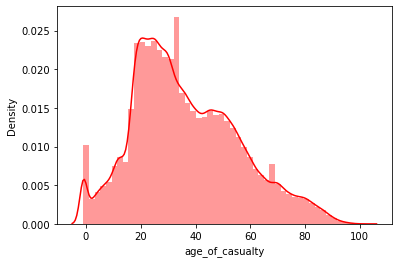

<Figure size 432x288 with 0 Axes>

In [153]:
sns.distplot(data['age_of_casualty'], color='red');
fig = plt.figure()

In [154]:
data['age_of_casualty'].unique()

array([ 23,  36,  24,  59,  28,  30,  33,  21,   7,  53,  29,  11,  62,
        34,  20,  38,  32,  52,  79,  37,  61,  80,  74,  77,  58,  22,
         2,  31,  51,  12,  83,  75,  89,  40,  46,   3,  56,  18,  39,
        15,  45,  73,  57,  48,  50,  81,  64,  16,  42,   0,  88,  26,
        14,  43,  27,  25,  68,  84,  35,  76,  65,  69,  19,  44,  13,
        49,  41,  71,  55,  17,  54,   9,  86,  47,  60,  90,  66,  72,
         5,  91,   4,  67,  10,   8,  82,  70,  -1,  63,  95,   6,  78,
        85,   1,  87,  93,  92,  96,  94,  97,  98, 101,  99, 100, 102],
      dtype=int64)

In [155]:
data['age_of_casualty'] = np.log(data['age_of_casualty'])
data=data[data['age_of_casualty']>=0]
data['age_of_casualty'].unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\mdasi\AppData\Local\Temp/ipykernel_4124/469062920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_of_casualty'] = np.log(data['age_of_casualty'])


array([3.13549422, 3.58351894, 3.17805383, 4.07753744, 3.33220451,
       3.40119738, 3.49650756, 3.04452244, 1.94591015, 3.97029191,
       3.36729583, 2.39789527, 4.12713439, 3.52636052, 2.99573227,
       3.63758616, 3.4657359 , 3.95124372, 4.36944785, 3.61091791,
       4.11087386, 4.38202663, 4.30406509, 4.34380542, 4.06044301,
       3.09104245, 0.69314718, 3.4339872 , 3.93182563, 2.48490665,
       4.41884061, 4.31748811, 4.48863637, 3.68887945, 3.8286414 ,
       1.09861229, 4.02535169, 2.89037176, 3.66356165, 2.7080502 ,
       3.80666249, 4.29045944, 4.04305127, 3.87120101, 3.91202301,
       4.39444915, 4.15888308, 2.77258872, 3.73766962, 4.47733681,
       3.25809654, 2.63905733, 3.76120012, 3.29583687, 3.21887582,
       4.21950771, 4.4308168 , 3.55534806, 4.33073334, 4.17438727,
       4.2341065 , 2.94443898, 3.78418963, 2.56494936, 3.8918203 ,
       3.71357207, 4.26267988, 4.00733319, 2.83321334, 3.98898405,
       2.19722458, 4.4543473 , 3.8501476 , 4.09434456, 4.49980

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


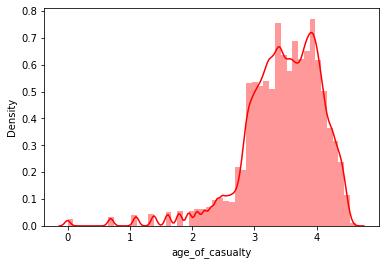

<Figure size 432x288 with 0 Axes>

In [156]:
sns.distplot(data['age_of_casualty'],color='red')
fig = plt.figure()

In [27]:
data.isnull().sum()

accident_year                   0
date                            0
day_of_week                     0
time                            0
longitude                     130
latitude                      130
local_authority_district        0
casualty_home_area_type         0
sex_of_casualty                 0
age_of_casualty                 0
age_band_of_casualty            0
accident_severity               0
casualty_type                   0
number_of_vehicles              0
first_road_class                0
road_type                       0
speed_limit                    34
junction_detail                 0
junction_control                0
light_conditions                0
weather_conditions              0
road_surface_conditions         0
special_conditions_at_site      0
carriageway_hazards             0
dtype: int64

In [212]:
accident_ml = data.drop('accident_severity' ,axis=1)
accident_ml = accident_ml[['day_of_week','casualty_home_area_type',
        'sex_of_casualty','age_of_casualty', 'junction_control',
        'light_conditions','weather_conditions', 'road_surface_conditions', 'carriageway_hazards']]

# Split the data into a training and test set. 
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              data['accident_severity'].values,test_size=0.20, random_state=99)

### Random forest

In [129]:
random_forest = RandomForestClassifier(n_estimators=200,verbose=1)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

C:\Users\mdasi\AppData\Local\Temp/ipykernel_4124/1546269827.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  9.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    6.7s finished


Accuracy 80.08
              precision    recall  f1-score   support

           1   0.043478  0.001257  0.002443      1591
           2   0.203390  0.009054  0.017336     21206
           3   0.805942  0.991885  0.889298     94519

    accuracy                       0.800794    117316
   macro avg   0.350937  0.334065  0.303026    117316
weighted avg   0.686685  0.800794  0.719655    117316



Predicted,1,2,3,All
Actual,,,,
1,2,21,1568,1591
2,8,192,21006,21206
3,36,731,93752,94519
All,46,944,116326,117316


### Logistic regression

In [299]:
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 80.61
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000      1558
           2   0.000000  0.000000  0.000000     21072
           3   0.806147  1.000000  0.892670     94108

    accuracy                       0.806147    116738
   macro avg   0.268716  0.333333  0.297557    116738
weighted avg   0.649873  0.806147  0.719624    116738



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Predicted,3,All
Actual,,
1,1558,1558
2,21072,21072
3,94108,94108
All,116738,116738


In [125]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv=3, random_state=0,multi_class='multinomial')
# Fit the model on the trainng data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Pre

Accuracy 80.57
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000      1591
           2   0.000000  0.000000  0.000000     21206
           3   0.805679  1.000000  0.892383     94519

    accuracy                       0.805679    117316
   macro avg   0.268560  0.333333  0.297461    117316
weighted avg   0.649118  0.805679  0.718974    117316



Predicted,3,All
Actual,,
1,1591,1591
2,21206,21206
3,94519,94519
All,117316,117316


In [300]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 75.48
              precision    recall  f1-score   support

           1   0.035088  0.016688  0.022619      1558
           2   0.191719  0.083286  0.116125     21072
           3   0.808008  0.917350  0.859214     94108

    accuracy                       0.754776    116738
   macro avg   0.344938  0.339108  0.332653    116738
weighted avg   0.686448  0.754776  0.713916    116738



Predicted,1,2,3,All
Actual,,,,
1,26,166,1366,1558
2,170,1755,19147,21072
3,545,7233,86330,94108
All,741,9154,106843,116738


In [126]:
decision_tree = DecisionTreeClassifier(min_samples_leaf=12, max_features=4)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 80.57
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000      1591
           2   0.481481  0.000613  0.001225     21206
           3   0.805745  0.999852  0.892365     94519

    accuracy                       0.805670    117316
   macro avg   0.429075  0.333488  0.297863    117316
weighted avg   0.736204  0.805670  0.719181    117316



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,2,3,All
Actual,,,
1,0,1591,1591
2,13,21193,21206
3,14,94505,94519
All,27,117289,117316


In [33]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
Y_pred = knn_clf.predict(X_test)
acc_decision_tree1 = round(knn_clf.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 77.17
              precision    recall  f1-score   support

           1   0.051020  0.006285  0.011192      1591
           2   0.200181  0.062671  0.095457     21206
           3   0.807315  0.943652  0.870176     94519

    accuracy                       0.771694    117316
   macro avg   0.352839  0.337536  0.325608    117316
weighted avg   0.687313  0.771694  0.718488    117316



Predicted,1,2,3,All
Actual,,,,
1,10,117,1464,1591
2,53,1329,19824,21206
3,133,5193,89193,94519
All,196,6639,110481,117316


# Deep learning

In [215]:
#LSTM


xs=MinMaxScaler()
ys=MinMaxScaler()
y_train=y_train.reshape(-1, 1)
s_xtr=xs.fit_transform(X_train)
s_ytr=ys.fit_transform(y_train)
s_xte=xs.fit_transform(X_test)

s_xtr, s_ytr=np.array(s_xtr), np.array(s_ytr)

sx=np.reshape(s_xtr,(s_xtr.shape[0],s_xtr.shape[1],1))
sy=np.reshape(s_ytr,(s_ytr.shape[0],s_ytr.shape[1],1))
sx=sx[:200]
sy=sy[:200]

In [92]:
model_lstm=Sequential()

model_lstm.add(LSTM(units=100, return_sequences=False,input_shape=(sx.shape[1],1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

optimizer=Adam(lr=0.0001)
model_lstm.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])
lstm_history=model_lstm.fit(sx,sy,epochs=20, batch_size=4, shuffle=True,validation_split=0.20,verbose=1)


Epoch 1/20


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


40/40 [==============================] - 6s 117ms/step - loss: 0.7535 - accuracy: 0.0188 - val_loss: 0.5825 - val_accuracy: 0.0250
Epoch 2/20
40/40 [==============================] - 5s 113ms/step - loss: 0.4643 - accuracy: 0.0250 - val_loss: 0.2363 - val_accuracy: 0.1000
Epoch 3/20
40/40 [==============================] - 4s 112ms/step - loss: 0.1071 - accuracy: 0.7625 - val_loss: 0.0674 - val_accuracy: 0.7750
Epoch 4/20
40/40 [==============================] - 4s 110ms/step - loss: 0.0697 - accuracy: 0.8250 - val_loss: 0.0654 - val_accuracy: 0.7750
Epoch 5/20
40/40 [==============================] - 4s 111ms/step - loss: 0.0672 - accuracy: 0.8250 - val_loss: 0.0722 - val_accuracy: 0.7750
Epoch 6/20
40/40 [==============================] - 4s 112ms/step - loss: 0.0699 - accuracy: 0.8250 - val_loss: 0.0680 - val_accuracy: 0.7750
Epoch 7/20
40/40 [==============================] - 4s 110ms/step - loss: 0.0654 - accuracy: 0.8250 - val_loss: 0.0708 - val_accuracy: 0.7750
Epoch 8/20
40/40 

In [210]:
print(model_lstm.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100)               40800     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
xte=np.array(s_xte)

xte=np.reshape(xte,(xte.shape[0],xte.shape[1],1))

xte=xte[:200]
pred=model_lstm.predict(xte)
xpred=model_lstm.predict(sx)

pred=ys.inverse_transform(pred)
xpred=ys.inverse_transform(xpred)

rmse_te=np.sqrt(np.mean((pred-y_test[:200])**2))
rmse_tr=np.sqrt(np.mean((xpred-y_train[:200])**2))
print('Trianing RMSE: ',rmse_tr)
print('Test RMSE: ',rmse_te)
print(lstm_history.history.keys())
print('\n')

Trianing RMSE:  0.4870832400368943
Test RMSE:  0.46496676958919914
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])




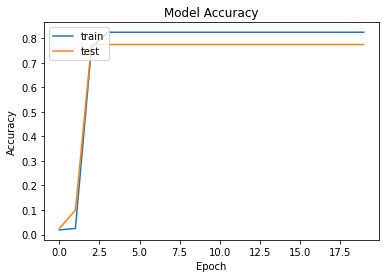

In [96]:
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

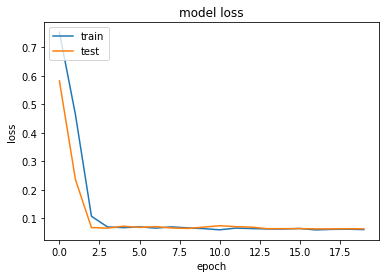

In [97]:
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.hiastory['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [124]:
final_loss, final_accuracy = model_lstm.evaluate(xte, yte[:200])
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

7/7 [==============================] - 1s 87ms/step - loss: 0.0551 - accuracy: 0.8400
Final Loss: 0.055057309567928314, Final Accuracy: 0.8399999737739563


In [ ]:
### CNN

In [216]:
xtrain,ytrain=np.array(X_train),np.array(y_train)
sx2=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
sy2=np.reshape(ytrain,(ytrain.shape[0],ytrain.shape[1],1))

In [217]:
modelc=Sequential()
modelc.add(Conv1D(filters=64,kernel_size=2, activation='relu',input_shape=(sx2.shape[1],1)))
modelc.add(MaxPooling1D(pool_size=2))
modelc.add(Flatten())
modelc.add(Dense(100,activation='relu'))
modelc.add(Dense(3))
modelc.compile(optimizer=optimizer,loss='mse',metrics=['accuracy'])
cnn_history=modelc.fit(sx2[:200],sy2[:200],epochs=20,verbose=1, validation_split=0.20)


Epoch 1/20
5/5 [==============================] - 0s 35ms/step - loss: 7.9971 - accuracy: 0.2375 - val_loss: 6.8647 - val_accuracy: 0.1500
Epoch 2/20
5/5 [==============================] - 0s 9ms/step - loss: 4.7821 - accuracy: 0.1875 - val_loss: 3.9240 - val_accuracy: 0.0250
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 2.4095 - accuracy: 0.0500 - val_loss: 1.9726 - val_accuracy: 0.0000e+00
Epoch 4/20
5/5 [==============================] - 0s 8ms/step - loss: 1.2079 - accuracy: 0.0000e+00 - val_loss: 0.9541 - val_accuracy: 0.0000e+00
Epoch 5/20
5/5 [==============================] - 0s 7ms/step - loss: 0.8031 - accuracy: 0.0000e+00 - val_loss: 0.5944 - val_accuracy: 0.0000e+00
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.7945 - accuracy: 0.0437 - val_loss: 0.5170 - val_accuracy: 0.0500
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.7972 - accuracy: 0.0562 - val_loss: 0.5129 - val_accuracy: 0.0750
Epoch 8/20
5

In [218]:
xtest=np.array(X_test)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
pred=modelc.predict(xtest,verbose=0)
xpred=modelc.predict(sx2,verbose=0)
rmse_test=np.sqrt(np.mean(pred[:200]-y_test[:200])**2)
rmse_train=np.sqrt(np.mean(xpred[:200]-ytrain[:200])**2)
print('Training RMSE: ',rmse_train)
print('Test RMSE: ',rmse_test)

ValueError: operands could not be broadcast together with shapes (200,3) (200,) 

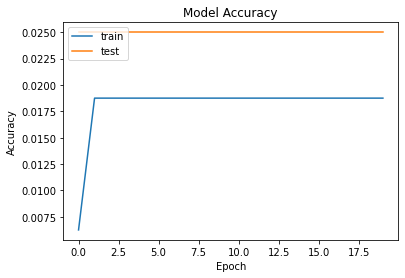

In [113]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

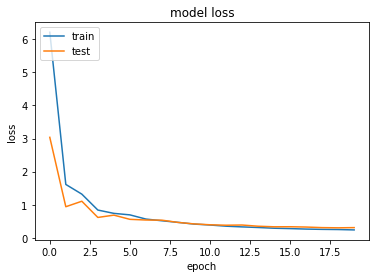

In [116]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
### GRU

In [119]:
modelg=Sequential()
modelg.add(GRU(100, return_sequences=False, input_shape=(sx.shape[1],1)))
modelg.add(Dropout(0.2))
modelg.add(Dense(units=1))
optimizer=Adam(lr=0.0001)
modelg.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['accuracy'])
gru_history=modelg.fit(sx,sy,epochs=20,batch_size=4,shuffle=True,validation_split=0.2)

Epoch 1/20


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


40/40 [==============================] - 7s 137ms/step - loss: 0.7531 - accuracy: 0.0188 - val_loss: 0.6001 - val_accuracy: 0.0250
Epoch 2/20
40/40 [==============================] - 5s 130ms/step - loss: 0.5178 - accuracy: 0.0188 - val_loss: 0.3699 - val_accuracy: 0.0250
Epoch 3/20
40/40 [==============================] - 5s 129ms/step - loss: 0.2736 - accuracy: 0.2562 - val_loss: 0.1249 - val_accuracy: 0.7750
Epoch 4/20
40/40 [==============================] - 5s 131ms/step - loss: 0.0785 - accuracy: 0.8250 - val_loss: 0.0664 - val_accuracy: 0.7750
Epoch 5/20
40/40 [==============================] - 5s 134ms/step - loss: 0.0626 - accuracy: 0.8250 - val_loss: 0.0642 - val_accuracy: 0.7750
Epoch 6/20
40/40 [==============================] - 5s 131ms/step - loss: 0.0682 - accuracy: 0.8250 - val_loss: 0.0632 - val_accuracy: 0.7750
Epoch 7/20
40/40 [==============================] - 5s 132ms/step - loss: 0.0569 - accuracy: 0.8250 - val_loss: 0.0630 - val_accuracy: 0.7750
Epoch 8/20
40/40 

In [220]:
print(modelg.summary())

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100)               30900     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 101       
                                                                 
Total params: 31,001
Trainable params: 31,001
Non-trainable params: 0
_________________________________________________________________
None


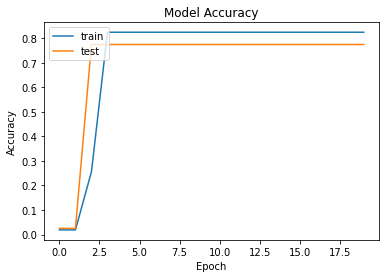

In [120]:
plt.plot(gru_history.history['accuracy'])
plt.plot(gru_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

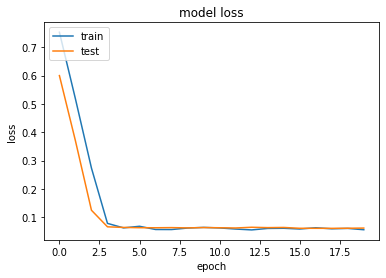

In [121]:
plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [161]:
### From tutorial 
### 1

In [199]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.datasets import load_wine
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.regularizers import l2
from keras.layers import Dense, Activation
import time
start_time = time.time()

In [175]:
X = data[['day_of_week','casualty_home_area_type',
        'sex_of_casualty','age_of_casualty', 'junction_control',
        'light_conditions','weather_conditions', 'road_surface_conditions', 'carriageway_hazards']]
y = data['accident_severity']

In [176]:
X.head()

,day_of_week,casualty_home_area_type,sex_of_casualty,age_of_casualty,junction_control,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards
0,3,1,1,3.135494,-1,5,1,1,0
1,3,1,2,3.583519,4,4,1,1,0
2,3,1,1,3.178054,4,4,1,1,0
3,3,1,2,4.077537,2,1,1,1,0
4,3,1,1,3.332205,-1,1,1,1,0


In [182]:
y.unique()

array([3, 2, 1], dtype=int64)

In [183]:
def ff(row):
    if row==1:
        return 0
    elif row==2:
        return 1
    elif row==3:
        return 2
y=y.apply(ff)

In [184]:
y.unique()

array([2, 1, 0], dtype=int64)

In [185]:
xtr,xte,ytr,yte=train_test_split(X,y,test_size=0.25, random_state=42)

In [186]:
sc=StandardScaler(with_mean=True, with_std=True)
sc.fit(xtr)

StandardScaler()

In [187]:
xtrs=sc.transform(xtr)
xtes=sc.transform(xte)

In [188]:
no_classes=3
ytr=keras.utils.to_categorical(ytr,no_classes)
yte=keras.utils.to_categorical(yte,no_classes)

In [189]:
model=Sequential()
model.add(Dense(9,input_dim=9, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='sigmoid'))
print(model.summary())

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 9)                 90        
                                                                 
 dense_27 (Dense)            (None, 64)                640       
                                                                 
 dense_28 (Dense)            (None, 3)                 195       
                                                                 
Total params: 925
Trainable params: 925
Non-trainable params: 0
_________________________________________________________________
None


In [190]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [196]:
history=model.fit(xtrs,ytr, batch_size=100, epochs=100, verbose=1, validation_split=0.20)

Epoch 1/100
3521/3521 [==============================] - 5s 1ms/step - loss: 0.5347 - accuracy: 0.8056 - val_loss: 0.5328 - val_accuracy: 0.8070
Epoch 2/100
3521/3521 [==============================] - 5s 1ms/step - loss: 0.5347 - accuracy: 0.8056 - val_loss: 0.5330 - val_accuracy: 0.8070
Epoch 3/100
3521/3521 [==============================] - 5s 1ms/step - loss: 0.5347 - accuracy: 0.8056 - val_loss: 0.5332 - val_accuracy: 0.8070
Epoch 4/100
3521/3521 [==============================] - 5s 1ms/step - loss: 0.5346 - accuracy: 0.8056 - val_loss: 0.5328 - val_accuracy: 0.8070
Epoch 5/100
3521/3521 [==============================] - 5s 1ms/step - loss: 0.5346 - accuracy: 0.8056 - val_loss: 0.5327 - val_accuracy: 0.8070
Epoch 6/100
3521/3521 [==============================] - 5s 1ms/step - loss: 0.5346 - accuracy: 0.8056 - val_loss: 0.5326 - val_accuracy: 0.8070
Epoch 7/100
3521/3521 [==============================] - 5s 1ms/step - loss: 0.5346 - accuracy: 0.8056 - val_loss: 0.5329 - val_ac

3521/3521 [==============================] - 5s 1ms/step - loss: 0.5341 - accuracy: 0.8056 - val_loss: 0.5331 - val_accuracy: 0.8070
Epoch 58/100
3521/3521 [==============================] - 5s 1ms/step - loss: 0.5341 - accuracy: 0.8056 - val_loss: 0.5334 - val_accuracy: 0.8070
Epoch 59/100
3521/3521 [==============================] - 4s 1ms/step - loss: 0.5342 - accuracy: 0.8056 - val_loss: 0.5330 - val_accuracy: 0.8070
Epoch 60/100
3521/3521 [==============================] - 5s 1ms/step - loss: 0.5342 - accuracy: 0.8056 - val_loss: 0.5330 - val_accuracy: 0.8070
Epoch 61/100
3521/3521 [==============================] - 5s 1ms/step - loss: 0.5341 - accuracy: 0.8056 - val_loss: 0.5332 - val_accuracy: 0.8070
Epoch 62/100
3521/3521 [==============================] - 4s 1ms/step - loss: 0.5341 - accuracy: 0.8056 - val_loss: 0.5332 - val_accuracy: 0.8070
Epoch 63/100
3521/3521 [==============================] - 4s 1ms/step - loss: 0.5342 - accuracy: 0.8056 - val_loss: 0.5330 - val_accuracy

In [207]:
score=model.evaluate(xtes, yte, verbose=1)
print("Names of the score metrics in model evaluation are: ")
print(model.metrics_names)
print("The score values are: Loss (Categorical Cross Entropy) and Accuracy (%)")
print(score)
print("\n")

4584/4584 [==============================] - 4s 963us/step - loss: 0.5389 - accuracy: 0.8051
Names of the score metrics in model evaluation are: 
['loss', 'accuracy']
The score values are: Loss (Categorical Cross Entropy) and Accuracy (%)
[0.5388577580451965, 0.8050597906112671]




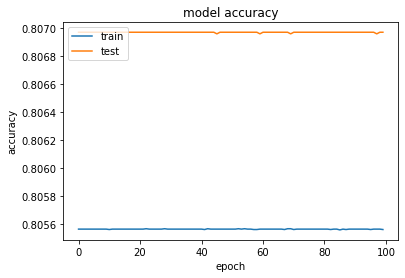

In [208]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


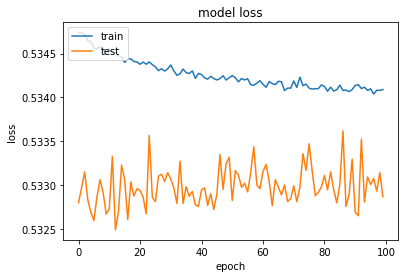

In [209]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [197]:
### 2


In [202]:
no_classes=3
test_split=0.25
batchsize=128

In [203]:
accuracy=[]
for OPTIMIZER in [SGD(),RMSprop(),Adam()]:
    for epoch_no in [100]:
        for neurons_no in [64]:
            model=Sequential()
            #input
            model.add(Dense(units=9,input_shape=(xtr.shape[1],),kernel_regularizer=l2()))
            model.add(Activation('relu'))
            #hidden
            model.add(Dense(units=neurons_no, kernel_regularizer=l2()))
            model.add(Activation('relu'))
            #output
            model.add(Dense(units=no_classes))
            model.add(Activation('softmax'))
            model.summary()
            #compile and fit
            model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])
            model.fit(xtrs,ytr,batch_size=batchsize,epochs=epoch_no,verbose=1, validation_split=test_split)
            #evaluate
            score=model.evaluate(xtes,yte,verbose=1)
            
            print()
            print('Optimizers: ', OPTIMIZER)
            print('Epoch Sizes: ', epoch_no)            
            print('Neurons or Units: ', neurons_no)            
            print("Test score:", score[0])
            print('Test accuracy:', score[1])
            accuracy.append(score[1])
            print()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 9)                 90        
                                                                 
 activation_6 (Activation)   (None, 9)                 0         
                                                                 
 dense_36 (Dense)            (None, 64)                640       
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 3)                 195       
                                                                 
 activation_8 (Activation)   (None, 3)                 0         
                                                                 
Total params: 925
Trainable params: 925
Non-trainable

Epoch 49/100
2579/2579 [==============================] - 3s 1ms/step - loss: 0.5404 - accuracy: 0.8054 - val_loss: 0.5368 - val_accuracy: 0.8073
Epoch 50/100
2579/2579 [==============================] - 3s 1ms/step - loss: 0.5404 - accuracy: 0.8054 - val_loss: 0.5368 - val_accuracy: 0.8073
Epoch 51/100
2579/2579 [==============================] - 3s 1ms/step - loss: 0.5404 - accuracy: 0.8054 - val_loss: 0.5367 - val_accuracy: 0.8073
Epoch 52/100
2579/2579 [==============================] - 3s 1ms/step - loss: 0.5404 - accuracy: 0.8054 - val_loss: 0.5367 - val_accuracy: 0.8073
Epoch 53/100
2579/2579 [==============================] - 3s 1ms/step - loss: 0.5404 - accuracy: 0.8054 - val_loss: 0.5368 - val_accuracy: 0.8073
Epoch 54/100
2579/2579 [==============================] - 3s 1ms/step - loss: 0.5404 - accuracy: 0.8054 - val_loss: 0.5368 - val_accuracy: 0.8073
Epoch 55/100
2579/2579 [==============================] - 3s 1ms/step - loss: 0.5404 - accuracy: 0.8054 - val_loss: 0.5370 -

 activation_9 (Activation)   (None, 9)                 0         
                                                                 
 dense_39 (Dense)            (None, 64)                640       
                                                                 
 activation_10 (Activation)  (None, 64)                0         
                                                                 
 dense_40 (Dense)            (None, 3)                 195       
                                                                 
 activation_11 (Activation)  (None, 3)                 0         
                                                                 
Total params: 925
Trainable params: 925
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2579/2579 [==============================] - 4s 1ms/step - loss: 0.5670 - accuracy: 0.8049 - val_loss: 0.5371 - val_accuracy: 0.8073
Epoch 2/100
2579/2579 [==============================] - 4s 1ms/s

2579/2579 [==============================] - 4s 1ms/step - loss: 0.5391 - accuracy: 0.8054 - val_loss: 0.5353 - val_accuracy: 0.8073
Epoch 52/100
2579/2579 [==============================] - 3s 1ms/step - loss: 0.5392 - accuracy: 0.8054 - val_loss: 0.5353 - val_accuracy: 0.8073
Epoch 53/100
2579/2579 [==============================] - 4s 1ms/step - loss: 0.5392 - accuracy: 0.8054 - val_loss: 0.5352 - val_accuracy: 0.8073
Epoch 54/100
2579/2579 [==============================] - 3s 1ms/step - loss: 0.5392 - accuracy: 0.8054 - val_loss: 0.5361 - val_accuracy: 0.8073
Epoch 55/100
2579/2579 [==============================] - 3s 1ms/step - loss: 0.5392 - accuracy: 0.8054 - val_loss: 0.5356 - val_accuracy: 0.8073
Epoch 56/100
2579/2579 [==============================] - 3s 1ms/step - loss: 0.5392 - accuracy: 0.8054 - val_loss: 0.5353 - val_accuracy: 0.8073
Epoch 57/100
2579/2579 [==============================] - 4s 2ms/step - loss: 0.5392 - accuracy: 0.8054 - val_loss: 0.5354 - val_accuracy

                                                                 
 dense_43 (Dense)            (None, 3)                 195       
                                                                 
 activation_14 (Activation)  (None, 3)                 0         
                                                                 
Total params: 925
Trainable params: 925
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2579/2579 [==============================] - 4s 1ms/step - loss: 0.5739 - accuracy: 0.8039 - val_loss: 0.5377 - val_accuracy: 0.8073
Epoch 2/100
2579/2579 [==============================] - 4s 1ms/step - loss: 0.5410 - accuracy: 0.8054 - val_loss: 0.5369 - val_accuracy: 0.8073
Epoch 3/100
2579/2579 [==============================] - 4s 1ms/step - loss: 0.5408 - accuracy: 0.8054 - val_loss: 0.5367 - val_accuracy: 0.8073
Epoch 4/100
2579/2579 [==============================] - 4s 1ms/step - loss: 0.5406 - accuracy: 0.8054 - 

2579/2579 [==============================] - 4s 1ms/step - loss: 0.5392 - accuracy: 0.8054 - val_loss: 0.5354 - val_accuracy: 0.8073
Epoch 54/100
2579/2579 [==============================] - 4s 1ms/step - loss: 0.5391 - accuracy: 0.8054 - val_loss: 0.5354 - val_accuracy: 0.8073
Epoch 55/100
2579/2579 [==============================] - 4s 1ms/step - loss: 0.5391 - accuracy: 0.8054 - val_loss: 0.5361 - val_accuracy: 0.8073
Epoch 56/100
2579/2579 [==============================] - 4s 1ms/step - loss: 0.5391 - accuracy: 0.8054 - val_loss: 0.5356 - val_accuracy: 0.8073
Epoch 57/100
2579/2579 [==============================] - 4s 1ms/step - loss: 0.5391 - accuracy: 0.8054 - val_loss: 0.5354 - val_accuracy: 0.8073
Epoch 58/100
2579/2579 [==============================] - 4s 1ms/step - loss: 0.5392 - accuracy: 0.8054 - val_loss: 0.5354 - val_accuracy: 0.8073
Epoch 59/100
2579/2579 [==============================] - 4s 1ms/step - loss: 0.5391 - accuracy: 0.8054 - val_loss: 0.5358 - val_accuracy

[0.8050597906112671, 0.8050597906112671, 0.8050597906112671]


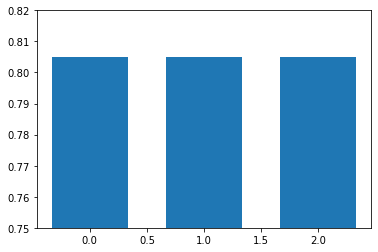


Execution Time 1441.4669842720032 seconds: 


In [206]:
print(accuracy)
y = accuracy; N = len(y); x = range(N); width = 1./1.5;
plt.ylim(0.75,.82)
plt.bar(x,y,width); plt.show()

print()
print("Execution Time %s seconds: " % (time.time() - start_time))   
